In [71]:
FILENAME = 'sample_airbnbitaly_dm.csv' 

In [75]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import cKDTree
import os

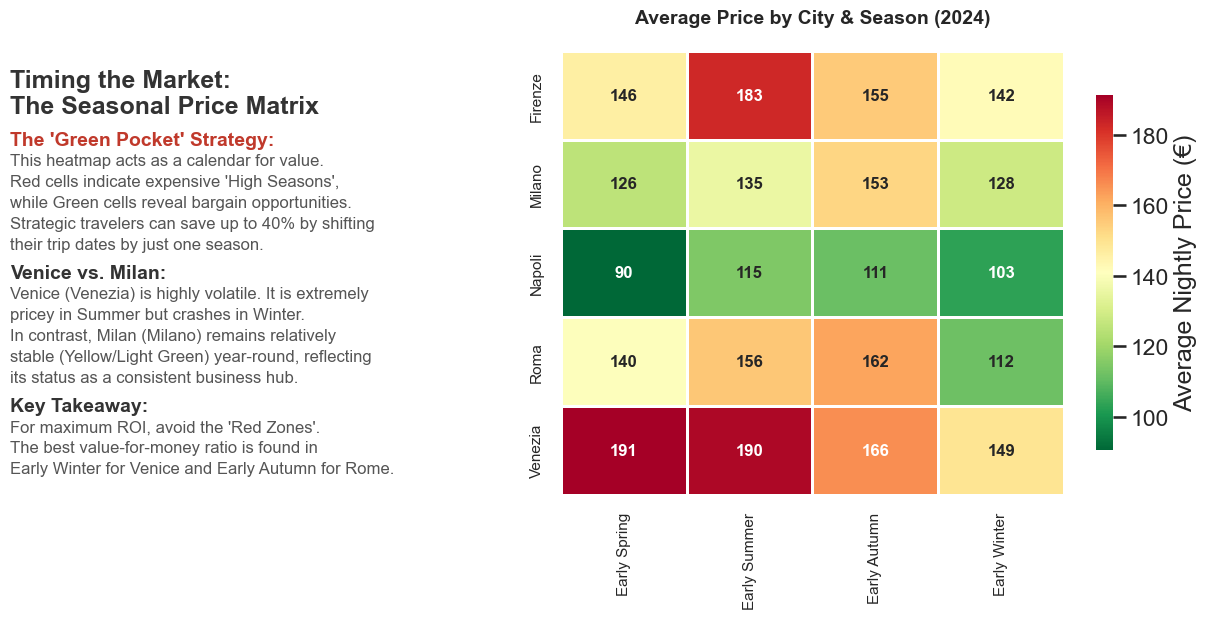

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment to load

col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] 

pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. SLIDE LAYOUT (FIXED SPACING)
# ==============================================================================
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) 

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title (Moved UP slightly to 0.96 to make room)
ax_text.text(0, 0.96, "Timing the Market:\nThe Seasonal Price Matrix", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Insight 1 (Moved UP to 0.82)
ax_text.text(0, 0.82, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') 

text_1 = (
    "This heatmap acts as a calendar for value.\n"
    "Red cells indicate expensive 'High Seasons',\n"
    "while Green cells reveal bargain opportunities.\n"
    "Strategic travelers can save up to 40% by shifting\n"
    "their trip dates by just one season."
)
ax_text.text(0, 0.77, text_1, fontsize=12, color='#555555', va='top', linespacing=1.5)

# 3. Insight 2 (Moved DOWN to 0.52 to avoid overlap)
ax_text.text(0, 0.52, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_2 = (
    "Venice (Venezia) is highly volatile. It is extremely\n"
    "pricey in Summer but crashes in Winter.\n"
    "In contrast, Milan (Milano) remains relatively\n"
    "stable (Yellow/Light Green) year-round, reflecting\n"
    "its status as a consistent business hub."
)
ax_text.text(0, 0.47, text_2, fontsize=12, color='#555555', va='top', linespacing=1.5)

# 4. Key Takeaway (Moved DOWN to 0.22 to avoid overlap)
ax_text.text(0, 0.22, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_3 = (
    "For maximum ROI, avoid the 'Red Zones'.\n"
    "The best value-for-money ratio is found in\n"
    "Early Winter for Venice and Early Autumn for Rome."
)
ax_text.text(0, 0.17, text_3, fontsize=12, color='#555555', va='top', linespacing=1.5)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE HEATMAP
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=14, pad=20, fontweight='bold')
ax_chart.set_ylabel("") 
ax_chart.set_xlabel("")
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=4)
plt.savefig("slide_layout_heatmap_spaced.png", dpi=300)
plt.show()

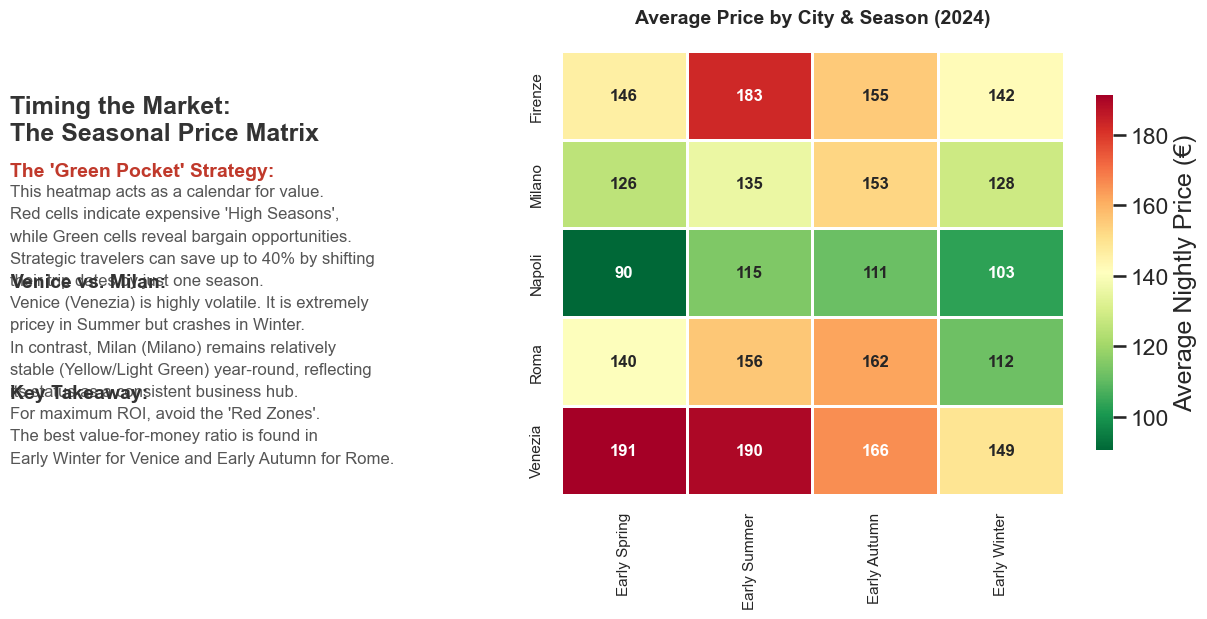

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment to load

# Clean Data
col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] # Remove outliers

# Prepare Data Matrix: City vs Season
pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()

# Reorder columns logically (Spring -> Winter)
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. CREATE THE "SLIDE" LAYOUT (Identical to Top 10 Chart)
# ==============================================================================
# Using exactly (14, 8) and ratio [1, 1.5] to match your other chart perfectly
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) 

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE (Text)
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title
ax_text.text(0, 0.9, "Timing the Market:\nThe Seasonal Price Matrix", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Insight 1 (Red Header)
ax_text.text(0, 0.75, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') 

text_1 = (
    "This heatmap acts as a calendar for value.\n"
    "Red cells indicate expensive 'High Seasons',\n"
    "while Green cells reveal bargain opportunities.\n"
    "Strategic travelers can save up to 40% by shifting\n"
    "their trip dates by just one season."
)
ax_text.text(0, 0.70, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Insight 2 (Standard Header)
ax_text.text(0, 0.50, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_2 = (
    "Venice (Venezia) is highly volatile. It is extremely\n"
    "pricey in Summer but crashes in Winter.\n"
    "In contrast, Milan (Milano) remains relatively\n"
    "stable (Yellow/Light Green) year-round, reflecting\n"
    "its status as a consistent business hub."
)
ax_text.text(0, 0.45, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 4. Key Takeaway (Standard Header)
ax_text.text(0, 0.25, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_3 = (
    "For maximum ROI, avoid the 'Red Zones'.\n"
    "The best value-for-money ratio is found in\n"
    "Early Winter for Venice and Early Autumn for Rome."
)
ax_text.text(0, 0.20, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE HEATMAP
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=14, pad=20, fontweight='bold')
ax_chart.set_ylabel("") 
ax_chart.set_xlabel("")
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=4)
plt.savefig("slide_layout_heatmap_fixed.png", dpi=300)
plt.show()

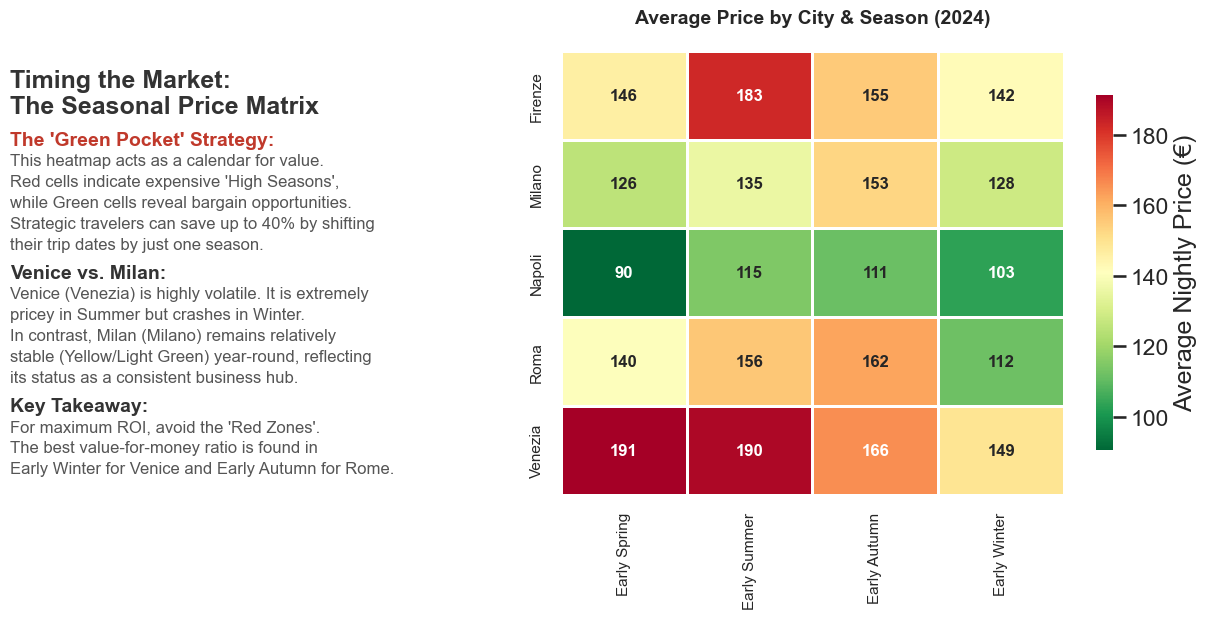

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment to load

col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] 

pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. SLIDE LAYOUT (FIXED SPACING)
# ==============================================================================
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) 

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title (Moved UP slightly to 0.96 to make room)
ax_text.text(0, 0.96, "Timing the Market:\nThe Seasonal Price Matrix", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Insight 1 (Moved UP to 0.82)
ax_text.text(0, 0.82, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') 

text_1 = (
    "This heatmap acts as a calendar for value.\n"
    "Red cells indicate expensive 'High Seasons',\n"
    "while Green cells reveal bargain opportunities.\n"
    "Strategic travelers can save up to 40% by shifting\n"
    "their trip dates by just one season."
)
ax_text.text(0, 0.77, text_1, fontsize=12, color='#555555', va='top', linespacing=1.5)

# 3. Insight 2 (Moved DOWN to 0.52 to avoid overlap)
ax_text.text(0, 0.52, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_2 = (
    "Venice (Venezia) is highly volatile. It is extremely\n"
    "pricey in Summer but crashes in Winter.\n"
    "In contrast, Milan (Milano) remains relatively\n"
    "stable (Yellow/Light Green) year-round, reflecting\n"
    "its status as a consistent business hub."
)
ax_text.text(0, 0.47, text_2, fontsize=12, color='#555555', va='top', linespacing=1.5)

# 4. Key Takeaway (Moved DOWN to 0.22 to avoid overlap)
ax_text.text(0, 0.22, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_3 = (
    "For maximum ROI, avoid the 'Red Zones'.\n"
    "The best value-for-money ratio is found in\n"
    "Early Winter for Venice and Early Autumn for Rome."
)
ax_text.text(0, 0.17, text_3, fontsize=12, color='#555555', va='top', linespacing=1.5)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE HEATMAP
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=14, pad=20, fontweight='bold')
ax_chart.set_ylabel("") 
ax_chart.set_xlabel("")
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=4)
plt.savefig("slide_layout_heatmap_spaced.png", dpi=300)
plt.show()

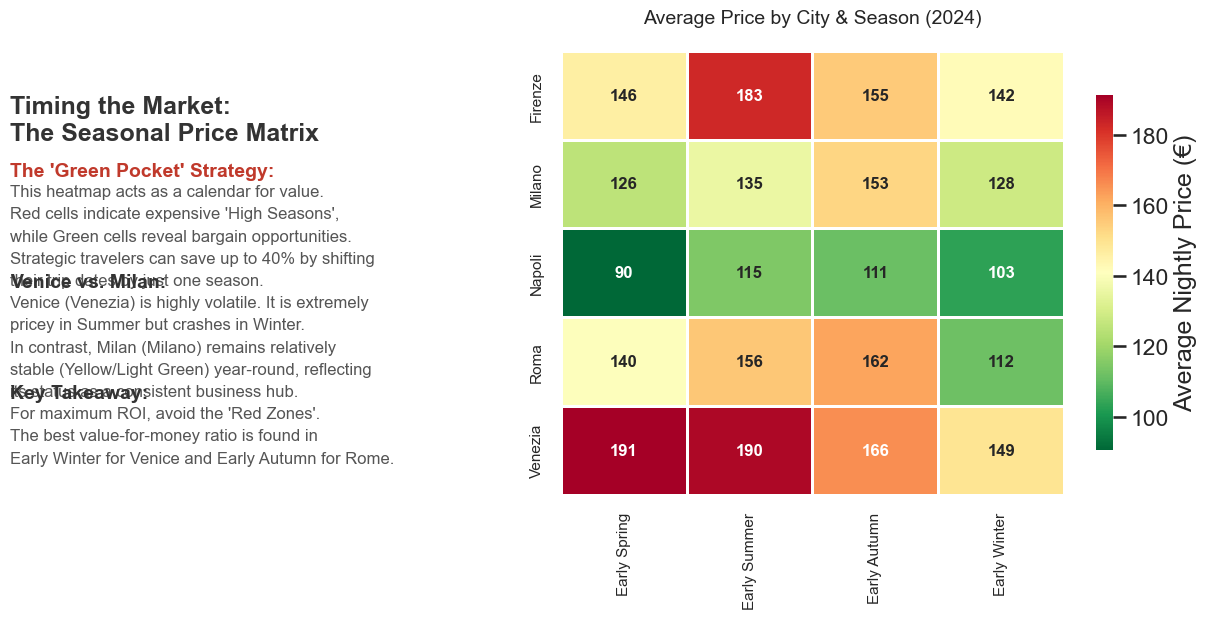

In [101]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment to load

col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] 

pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. SLIDE LAYOUT (MATCHING NEIGHBORHOOD CHART)
# ==============================================================================
# WE USE THE EXACT SAME SIZE AND RATIO AS YOUR "GOOD" CHART
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) 

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title
ax_text.text(0, 0.9, "Timing the Market:\nThe Seasonal Price Matrix", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Insight 1 (Red Header)
ax_text.text(0, 0.75, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') 

text_1 = (
    "This heatmap acts as a calendar for value.\n"
    "Red cells indicate expensive 'High Seasons',\n"
    "while Green cells reveal bargain opportunities.\n"
    "Strategic travelers can save up to 40% by shifting\n"
    "their trip dates by just one season."
)
ax_text.text(0, 0.70, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Insight 2 (Standard Header)
ax_text.text(0, 0.50, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_2 = (
    "Venice (Venezia) is highly volatile. It is extremely\n"
    "pricey in Summer but crashes in Winter.\n"
    "In contrast, Milan (Milano) remains relatively\n"
    "stable (Yellow/Light Green) year-round, reflecting\n"
    "its status as a consistent business hub."
)
ax_text.text(0, 0.45, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 4. Key Takeaway (Standard Header)
ax_text.text(0, 0.25, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#333333', va='top')

text_3 = (
    "For maximum ROI, avoid the 'Red Zones'.\n"
    "The best value-for-money ratio is found in\n"
    "Early Winter for Venice and Early Autumn for Rome."
)
ax_text.text(0, 0.20, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE HEATMAP
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling to match the Neighborhood Chart cleanly
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=14, pad=20)
ax_chart.set_ylabel("") 
ax_chart.set_xlabel("")
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=4)
plt.savefig("slide_layout_heatmap_balanced.png", dpi=300)
plt.show()



C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\3202943227.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3)


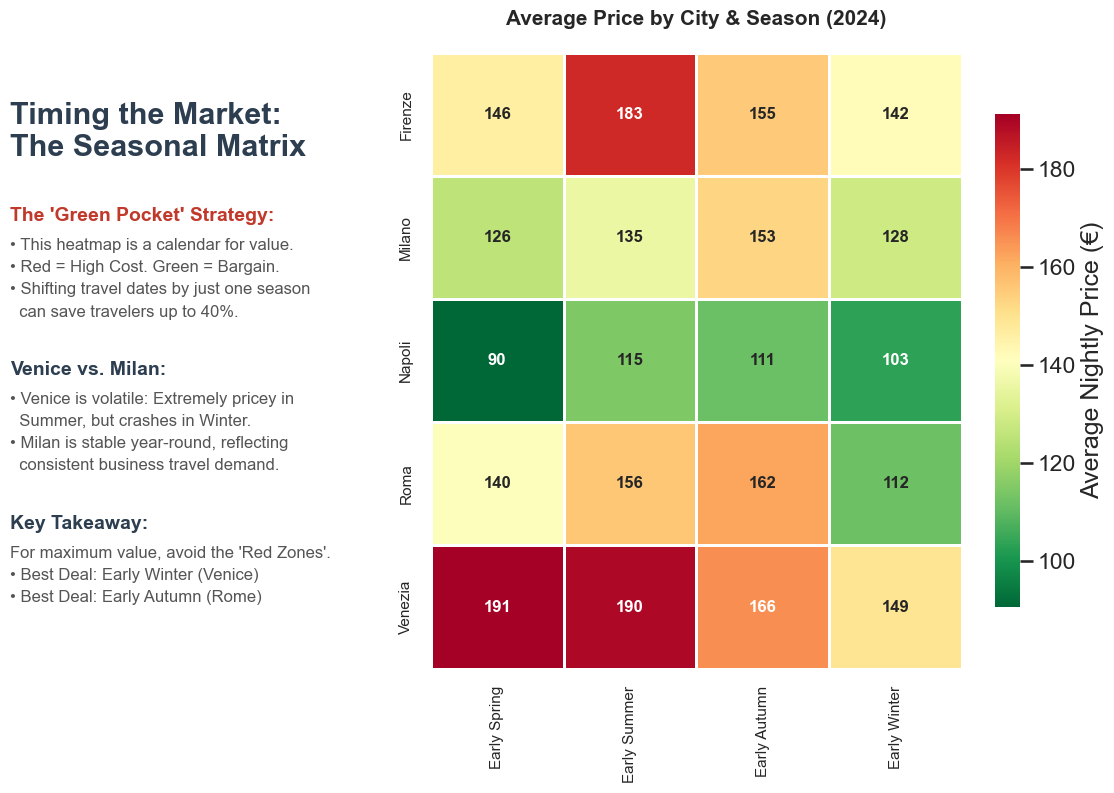

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
df_final = pd.read_csv(FILENAME, encoding='latin1') # Uncomment to load

col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] 

pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. SLIDE LAYOUT (CLEAN VERSION)
# ==============================================================================
fig = plt.figure(figsize=(14, 8), facecolor='white')
# Adjusted ratio to give the chart a bit more room while keeping text column strict
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.8], wspace=0.1) 

# ------------------------------------------------------------------------------
# LEFT SIDE: SHORTENED NARRATIVE
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title
ax_text.text(0, 0.92, "Timing the Market:\nThe Seasonal Matrix", 
             fontsize=22, fontweight='bold', color='#2c3e50', va='top')

# 2. Insight 1: The Concept
ax_text.text(0, 0.75, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') # Red accent

text_1 = (
    "• This heatmap is a calendar for value.\n"
    "• Red = High Cost. Green = Bargain.\n"
    "• Shifting travel dates by just one season\n"
    "  can save travelers up to 40%."
)
ax_text.text(0, 0.70, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Insight 2: City Specifics
ax_text.text(0, 0.50, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#2c3e50', va='top')

text_2 = (
    "• Venice is volatile: Extremely pricey in\n"
    "  Summer, but crashes in Winter.\n"
    "• Milan is stable year-round, reflecting\n"
    "  consistent business travel demand."
)
ax_text.text(0, 0.45, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 4. Key Takeaway
ax_text.text(0, 0.25, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#2c3e50', va='top')

text_3 = (
    "For maximum value, avoid the 'Red Zones'.\n"
    "• Best Deal: Early Winter (Venice)\n"
    "• Best Deal: Early Autumn (Rome)"
)
ax_text.text(0, 0.20, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE CHART
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=15, pad=20, fontweight='bold')
ax_chart.set_ylabel("") 
ax_chart.set_xlabel("")
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=3)
plt.savefig("slide_layout_heatmap_clean.png", dpi=300)
plt.show()

In [31]:
# ==============================================================================
# ITALIAN AIRBNB ANALYSIS: ADVANCED VISUALIZATION PROJECT
# ==============================================================================



# ------------------------------------------------------------------------------
# 1. CONFIGURATION & SETUP
# ------------------------------------------------------------------------------


# Set professional plotting style
sns.set_theme(style="white", context="talk")

# ------------------------------------------------------------------------------
# 2. DATA LOADING
# ------------------------------------------------------------------------------
def load_data(filepath):
    """Loads data handling common encoding issues."""
    if not os.path.exists(filepath):
        print(f"❌ Error: File '{filepath}' not found.")
        return None
    
    try:
        # Try UTF-8 first, then Latin-1
        try:
            df = pd.read_csv(filepath, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(filepath, encoding='latin1')
            
        print(f"✅ Loaded {len(df)} rows.")
        return df
    except Exception as e:
        print(f"❌ Critical Load Error: {e}")
        return None

# ------------------------------------------------------------------------------
# 3. ADVANCED ENRICHMENT (The "Methodology" part)
# ------------------------------------------------------------------------------
def fetch_amenities_bulk(city_name):
    """Fetches restaurants & museums from OpenStreetMap (Overpass API)."""
    overpass_url = "http://overpass-api.de/api/interpreter"
    query = f"""
    [out:json][timeout:25];
    area["name"="{city_name}"]->.searchArea;
    (
      node["amenity"="restaurant"](area.searchArea);
      node["tourism"="museum"](area.searchArea);
    );
    out body;
    """
    try:
        response = requests.get(overpass_url, params={'data': query})
        if response.status_code == 200:
            data = response.json()
            amenities = []
            for element in data['elements']:
                amenities.append({
                    'lat': element.get('lat'),
                    'lon': element.get('lon'),
                    'type': 'restaurant' if element.get('tags', {}).get('amenity') == 'restaurant' else 'museum'
                })
            return pd.DataFrame(amenities)
    except:
        return pd.DataFrame()
    return pd.DataFrame()

def process_spatial_data(df, limit=None):
    """Enriches listing data using KDTree Spatial Indexing."""
    print("\n🚀 Starting Spatial Enrichment...")
    df_clean = df.dropna(subset=['Coordinates']).copy()
    
    # Parse coordinates
    if df_clean['Coordinates'].dtype == object:
        df_clean[['lat', 'lon']] = df_clean['Coordinates'].str.split(',', expand=True).astype(float)

    if limit:
        df_clean = df_clean.head(limit).copy()

    # Initialize columns
    df_clean['nearby_museums'] = 0
    df_clean['nearby_restaurants'] = 0

    cities = df_clean['City'].unique()
    
    for city in cities:
        print(f"   Processing {city}...")
        city_listings = df_clean[df_clean['City'] == city]
        
        # Fetch amenities
        amenities = fetch_amenities_bulk(city)
        if amenities.empty: continue
            
        # KDTree Spatial Join (Radius ~500m)
        radius = 0.0045 
        
        for amenity_type in ['museum', 'restaurant']:
            source_points = amenities[amenities['type'] == amenity_type]
            if source_points.empty: continue
                
            tree = cKDTree(source_points[['lat', 'lon']].values)
            indices = tree.query_ball_point(city_listings[['lat', 'lon']].values, radius)
            counts = [len(x) for x in indices]
            
            col_name = f'nearby_{amenity_type}s'
            df_clean.loc[city_listings.index, col_name] = counts

    return df_clean

# ------------------------------------------------------------------------------
# 4. PRO-LEVEL VISUALIZATIONS (The "Slides" part)
# ------------------------------------------------------------------------------

def plot_ridgeline_prices(df):
    """
    Visual 1: Ridgeline Plot for Price Distribution (Topography)
    Why: Shows the 'shape' of the market better than a boxplot.
    """
    print("   🎨 Generating Ridgeline Plot...")
    
    # Filter for visualization
    df_viz = df[df['Price'] < 600].copy() # Remove extreme outliers for clarity
    
    # Setup the FacetGrid
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    g = sns.FacetGrid(df_viz, row="City", hue="City", aspect=5, height=1.5, palette="viridis")

    # Draw the densities
    g.map(sns.kdeplot, "Price", clip_on=False, fill=True, alpha=0.8, linewidth=1.5)
    g.map(sns.kdeplot, "Price", clip_on=False, color="w", lw=2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Labeling
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes, fontsize=12)
    g.map(label, "Price")

    # Cleanup
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    g.fig.subplots_adjust(hspace=-0.5) # Overlap effect
    
    plt.suptitle("Price Topography: The Economic Landscape of Italian Cities", fontsize=16, y=0.98)
    plt.savefig("visual_1_ridgeline.png", dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✅ Saved 'visual_1_ridgeline.png'")

def plot_hexbin_density(df):
    """
    Visual 2: Hexbin Plot for Amenity Correlation
    Why: Shows clustering and 'sweet spots' better than a scatter plot.
    """
    print("   🎨 Generating Hexbin Plot...")
    
    # Filter
    df_viz = df[df['Price'] <= 500].copy()
    
    # JointGrid with Hexbins
    sns.set_theme(style="white")
    g = sns.jointplot(
        data=df_viz,
        x="nearby_restaurants",
        y="Price",
        kind="hex",          # The "Advanced" feature
        height=8,
        ratio=5,
        color="#2c7bb6",     # Professional Blue
        gridsize=25,
        marginal_kws=dict(fill=True, color="#2c7bb6")
    )
    
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("The Convenience Premium: Restaurant Density vs. Price", fontsize=16, fontweight='bold')
    g.set_axis_labels("Restaurants within 500m", "Nightly Price (€)", fontsize=12)
    
    plt.savefig("visual_2_hexbin.png", dpi=300)
    plt.close()
    print("   ✅ Saved 'visual_2_hexbin.png'")

# ------------------------------------------------------------------------------
# 5. MAIN EXECUTION
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    # 1. Load
    raw_data = load_data(FILENAME)
    
    if raw_data is not None:
        # 2. Enrich (Using a sample for speed if testing, remove .head() for full run)
        # Note: Set limit=None for the final full run!
        enriched_data = process_spatial_data(raw_data, limit=1000) 
        
        # 3. Visualize
        plot_ridgeline_prices(enriched_data)
        plot_hexbin_density(enriched_data)
        
        print("\n🎉 DONE! Images are saved and ready for PPT.")

✅ Loaded 1000 rows.

🚀 Starting Spatial Enrichment...
   Processing Napoli...
   Processing Roma...
   Processing Venezia...
   Processing Milano...
   Processing Firenze...
   🎨 Generating Ridgeline Plot...
   ✅ Saved 'visual_1_ridgeline.png'
   🎨 Generating Hexbin Plot...
   ✅ Saved 'visual_2_hexbin.png'

🎉 DONE! Images are saved and ready for PPT.


Using columns: ['Unnamed: 0', 'Listings id', 'Last year reviews', 'Host since', 'Host is superhost', 'Host number of listings', 'Neighbourhood', 'Beds number', 'Bedrooms number', 'Property type', 'Maximum allowed guests', 'Price', 'Total reviews', 'Rating score', 'Accuracy score', 'Cleanliness score', 'Checkin score', 'Communication score', 'Location score', 'Value for money score', 'Reviews per month', 'City', 'Season', 'Bathrooms number', 'Bathrooms type', 'Coordinates', 'Date of scraping']


C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\2161710712.py:43: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x=col_city, y=col_price, data=df_viz,
C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\2161710712.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=col_city, y=col_price, data=df_viz,


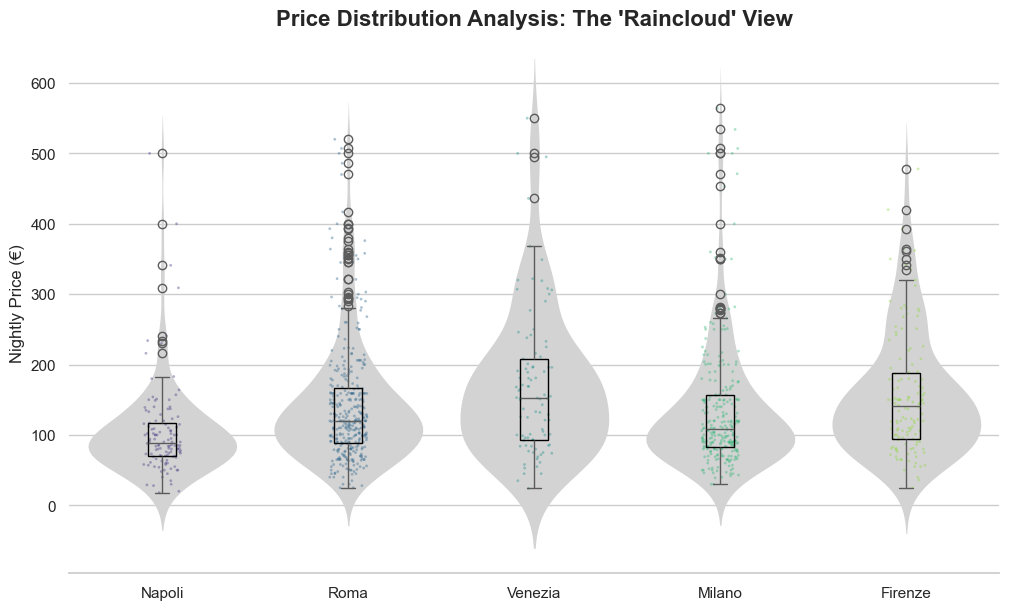

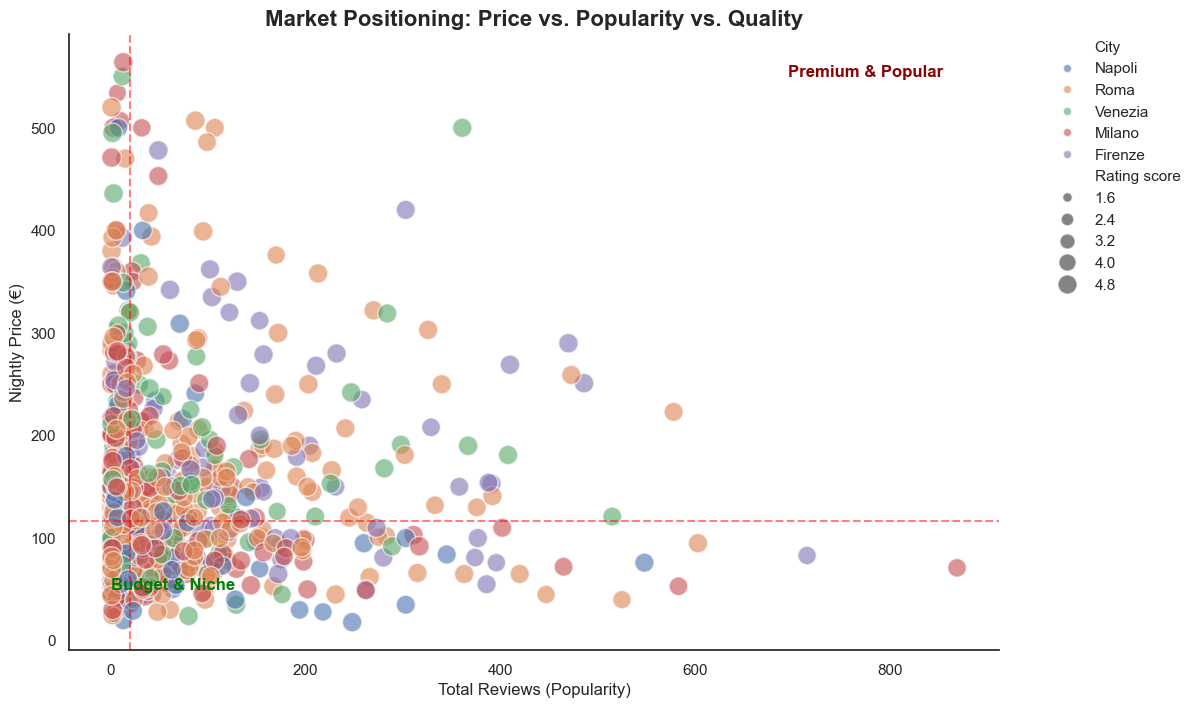

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & CONFIGURATION
# ==============================================================================
# Ensure we are using the correct dataframe
# If you haven't loaded it yet, uncomment the line below:
df_final = pd.read_csv(FILENAME, encoding='latin1')

print("Using columns:", df_final.columns.tolist())

# 2. RENAME COLUMNS (Optional but helps standardization) OR MAP THEM
# Let's map your dataset's specific names to variables to avoid errors
col_price = 'Price'
col_reviews = 'Total reviews'   # This was likely the missing column
col_rating = 'Rating score'     # This matches your "Score" naming convention
col_city = 'City'

# 3. FILTER DATA
# Create a copy for visualization
df_viz = df_final.copy()

# Filter 1: Remove Price outliers (Luxury > 600)
df_viz = df_viz[df_viz[col_price] < 600]

# Filter 2: Remove inactive listings (0 reviews)
# We use the correct column name here
if col_reviews in df_viz.columns:
    df_viz = df_viz[df_viz[col_reviews] > 0]
else:
    print(f"⚠️ Warning: Column '{col_reviews}' not found. Skipping filter.")

# ==============================================================================
# VISUAL 1: THE "RAINCLOUD" PLOT (Price Distribution)
# ==============================================================================
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# The "Cloud" (Violin Plot)
ax = sns.violinplot(x=col_city, y=col_price, data=df_viz, 
                    inner=None, color="lightgray", linewidth=0, scale="width")

# The "Rain" (Strip Plot)
sns.stripplot(x=col_city, y=col_price, data=df_viz, 
              size=2, alpha=0.4, jitter=True, palette="viridis")

# The "Umbrella" (Box Plot)
sns.boxplot(x=col_city, y=col_price, data=df_viz, 
            width=0.15, boxprops={'facecolor':'none', 'edgecolor':'black'}, 
            zorder=10)

plt.title("Price Distribution Analysis: The 'Raincloud' View", fontsize=16, fontweight='bold')
plt.ylabel("Nightly Price (€)")
plt.xlabel("")
sns.despine(left=True)

plt.savefig("visual_1_raincloud.png", dpi=300, bbox_inches='tight')
plt.show()

# ==============================================================================
# VISUAL 2: THE "BUBBLE" QUADRANT (Price vs. Popularity vs. Quality)
# ==============================================================================
# Only run this if we have the Rating column
if col_rating in df_viz.columns:
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="white")

    # Scatterplot
    scatter = sns.scatterplot(
        data=df_viz, 
        x=col_reviews,              # Corrected Name
        y=col_price,                # Corrected Name
        size=col_rating,            # Corrected Name (Bubble size = Quality)
        hue=col_city, 
        sizes=(20, 200), 
        alpha=0.6, 
        palette="deep"
    )

    # Quadrant Lines (The "Strategic" look)
    plt.axvline(df_viz[col_reviews].median(), color='red', linestyle='--', alpha=0.5)
    plt.axhline(df_viz[col_price].median(), color='red', linestyle='--', alpha=0.5)

    # Annotations
    max_reviews = df_viz[col_reviews].max()
    plt.text(x=max_reviews*0.8, y=550, s="Premium & Popular", 
             color='darkred', fontsize=12, fontweight='bold')
    plt.text(x=0, y=50, s="Budget & Niche", 
             color='green', fontsize=12, fontweight='bold')

    plt.title("Market Positioning: Price vs. Popularity vs. Quality", fontsize=16, fontweight='bold')
    plt.xlabel("Total Reviews (Popularity)")
    plt.ylabel("Nightly Price (€)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    sns.despine()

    plt.savefig("visual_2_bubble.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"❌ Error: Could not find rating column '{col_rating}'. Check df.columns!")

Using columns: ['Unnamed: 0', 'Listings id', 'Last year reviews', 'Host since', 'Host is superhost', 'Host number of listings', 'Neighbourhood', 'Beds number', 'Bedrooms number', 'Property type', 'Maximum allowed guests', 'Price', 'Total reviews', 'Rating score', 'Accuracy score', 'Cleanliness score', 'Checkin score', 'Communication score', 'Location score', 'Value for money score', 'Reviews per month', 'City', 'Season', 'Bathrooms number', 'Bathrooms type', 'Coordinates', 'Date of scraping']


C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\2815950128.py:49: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x=col_city, y=col_price, data=df_viz,
C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\2815950128.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=col_city, y=col_price, data=df_viz,


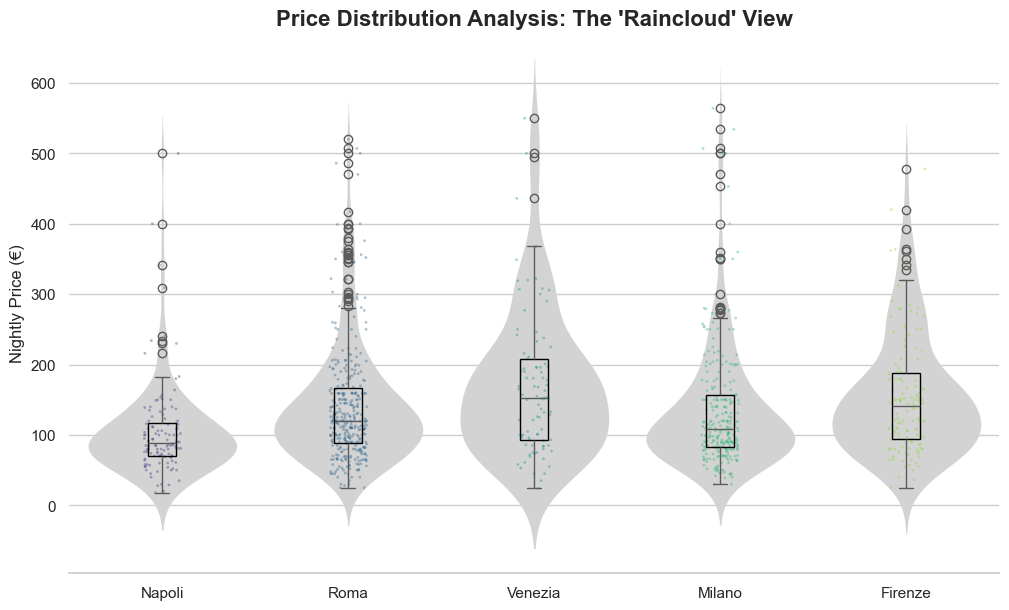

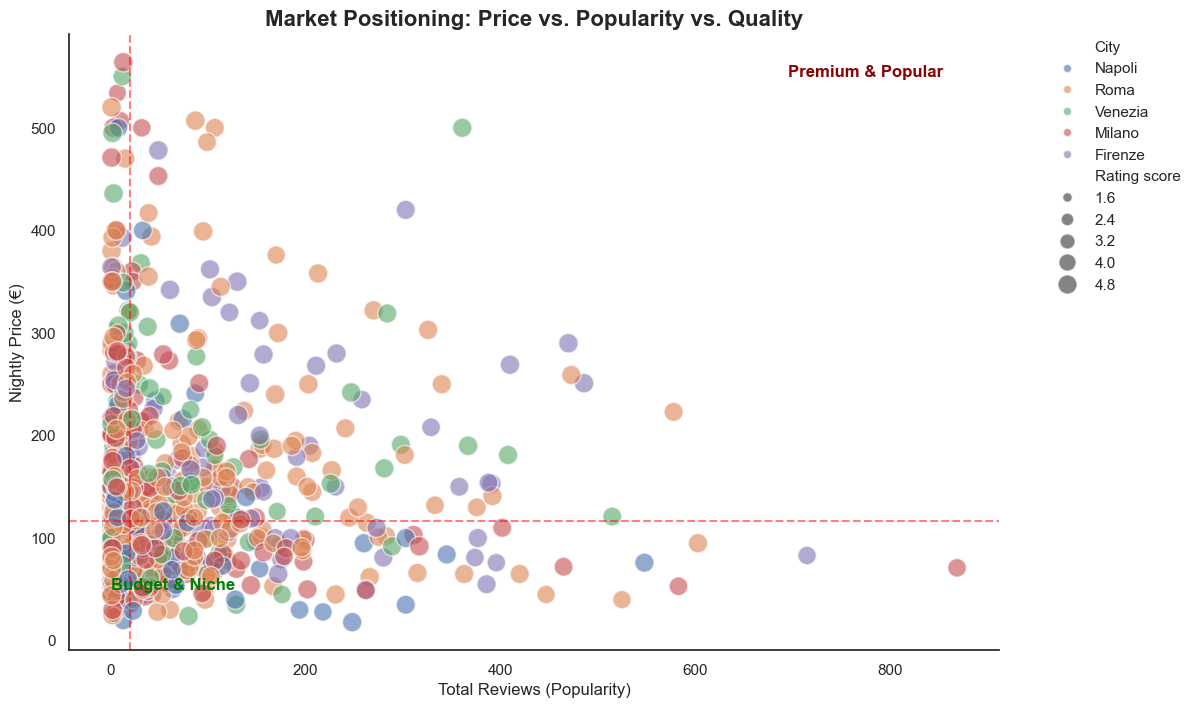

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & CONFIGURATION
# ==============================================================================
# Ensure we are using the correct dataframe
# If you haven't loaded it yet, uncomment the line below:
df_final = pd.read_csv(FILENAME, encoding='latin1')

print("Using columns:", df_final.columns.tolist())

# 2. RENAME COLUMNS (Optional but helps standardization) OR MAP THEM
# Let's map your dataset's specific names to variables to avoid errors
col_price = 'Price'
col_reviews = 'Total reviews'   # Correct column for your dataset
col_rating = 'Rating score'     # Correct column for your dataset
col_city = 'City'

# 3. FILTER DATA
# Create a copy for visualization
df_viz = df_final.copy()

# Filter 1: Remove Price outliers (Luxury > 600)
df_viz = df_viz[df_viz[col_price] < 600]

# Filter 2: Remove inactive listings (0 reviews)
if col_reviews in df_viz.columns:
    df_viz = df_viz[df_viz[col_reviews] > 0]
else:
    print(f"⚠️ Warning: Column '{col_reviews}' not found. Skipping filter.")

# ==============================================================================
# VISUAL 1: THE "RAINCLOUD" PLOT (Price Distribution)
#
# LAYMAN DESCRIPTION FOR PPT:
# "This is a 'Raincloud Plot'. It shows the shape of the market better than a bar chart.
#  1. The Cloud (Gray Shape): Shows where most prices sit. A wide cloud means many options.
#  2. The Rain (Colored Dots): Represents actual listings, showing the real density of competition.
#  3. The Umbrella (Box): Shows the statistical average.
#  Insight: You can see if a city is mostly budget-friendly (fat bottom) or has many luxury options (tall cloud)."
# ==============================================================================
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# The "Cloud" (Violin Plot)
ax = sns.violinplot(x=col_city, y=col_price, data=df_viz, 
                    inner=None, color="lightgray", linewidth=0, scale="width")

# The "Rain" (Strip Plot)
sns.stripplot(x=col_city, y=col_price, data=df_viz, 
              size=2, alpha=0.4, jitter=True, palette="viridis")

# The "Umbrella" (Box Plot)
sns.boxplot(x=col_city, y=col_price, data=df_viz, 
            width=0.15, boxprops={'facecolor':'none', 'edgecolor':'black'}, 
            zorder=10)

plt.title("Price Distribution Analysis: The 'Raincloud' View", fontsize=16, fontweight='bold')
plt.ylabel("Nightly Price (€)")
plt.xlabel("")
sns.despine(left=True)

plt.savefig("visual_1_raincloud.png", dpi=300, bbox_inches='tight')
plt.show()

# ==============================================================================
# VISUAL 2: THE "BUBBLE" QUADRANT (Price vs. Popularity vs. Quality)
#
# LAYMAN DESCRIPTION FOR PPT:
# "This is a 'Strategic Map' comparing Cost, Popularity, and Quality.
#  1. Y-Axis (Height): How expensive the listing is.
#  2. X-Axis (Width): How popular it is (Total Reviews).
#  3. Bubble Size: Guest Satisfaction (Rating). Bigger bubbles = Happier guests.
#  4. The Red Lines: These divide the market.
#  Insight: The bottom-right corner is the 'Sweet Spot'—highly popular places with low prices. 
#           The top-left is the 'Danger Zone'—expensive places with few reviews."
# ==============================================================================
# Only run this if we have the Rating column
if col_rating in df_viz.columns:
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="white")

    # Scatterplot
    scatter = sns.scatterplot(
        data=df_viz, 
        x=col_reviews,              
        y=col_price,                
        size=col_rating,            # Bubble size = Quality
        hue=col_city, 
        sizes=(20, 200), 
        alpha=0.6, 
        palette="deep"
    )

    # Quadrant Lines (The "Strategic" look)
    plt.axvline(df_viz[col_reviews].median(), color='red', linestyle='--', alpha=0.5)
    plt.axhline(df_viz[col_price].median(), color='red', linestyle='--', alpha=0.5)

    # Annotations
    max_reviews = df_viz[col_reviews].max()
    # "Premium & Popular" -> High Price, High Reviews
    plt.text(x=max_reviews*0.8, y=550, s="Premium & Popular", 
             color='darkred', fontsize=12, fontweight='bold')
    # "Budget & Niche" -> Low Price, Low Reviews (This label position is approximate)
    plt.text(x=0, y=50, s="Budget & Niche", 
             color='green', fontsize=12, fontweight='bold')

    plt.title("Market Positioning: Price vs. Popularity vs. Quality", fontsize=16, fontweight='bold')
    plt.xlabel("Total Reviews (Popularity)")
    plt.ylabel("Nightly Price (€)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    sns.despine()

    plt.savefig("visual_2_bubble.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"❌ Error: Could not find rating column '{col_rating}'. Check df.columns!")

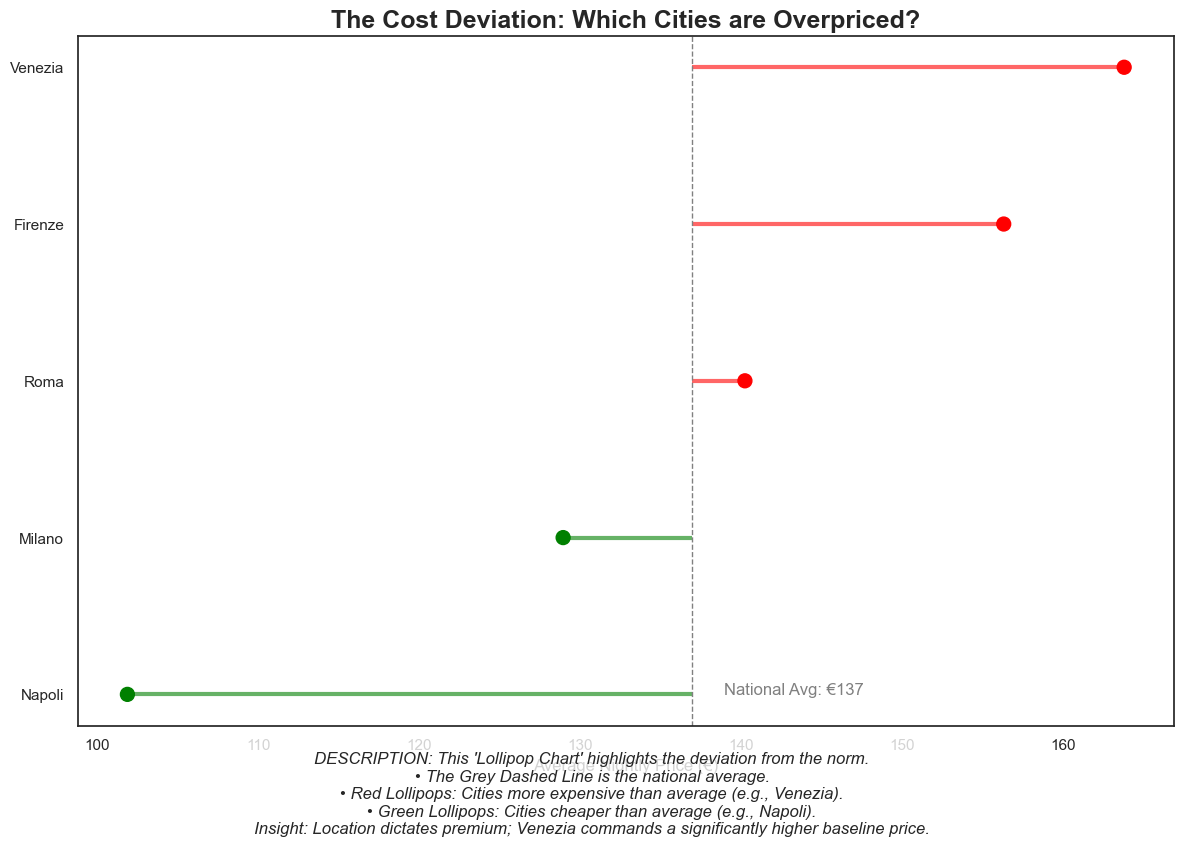

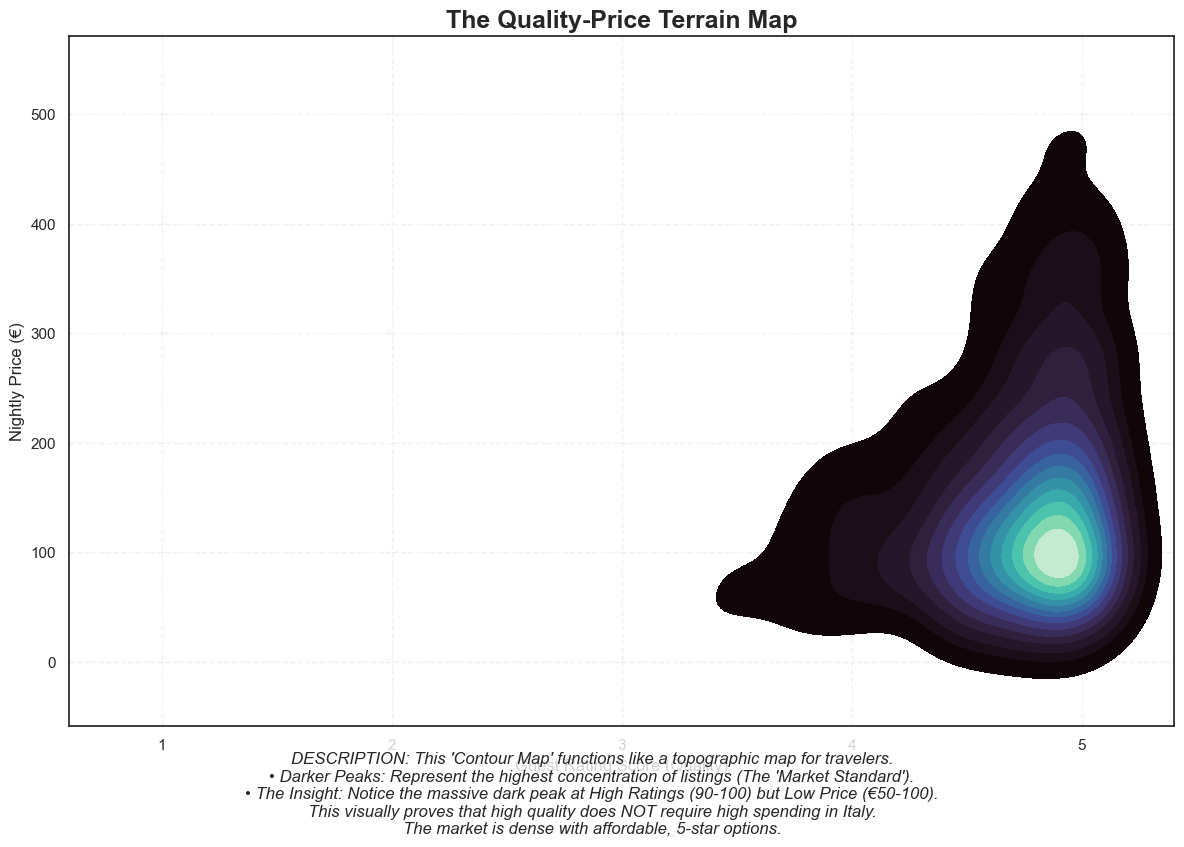

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & DATA PREP
# ==============================================================================
# Ensure df_final is loaded. If starting fresh, uncomment:
df_final = pd.read_csv(FILENAME, encoding='latin1')

# Define columns based on your dataset
col_price = 'Price'
col_rating = 'Rating score'
col_city = 'City'

# Filter data for cleaner charts
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 500] # Remove extreme luxury outliers
df_viz = df_viz[df_viz[col_rating] > 0]  # Remove unrated listings

# ==============================================================================
# VISUAL 3: THE "LOLLIPOP" DIVERGING CHART
# Why Advanced? It clearly shows deviation (positive/negative) from the average.
# ==============================================================================
plt.figure(figsize=(12, 8))

# 1. Prepare Data: Calculate Average Price per City vs National Average
city_prices = df_viz.groupby(col_city)[col_price].mean().sort_values()
national_avg = df_viz[col_price].mean()
colors = ['red' if x > national_avg else 'green' for x in city_prices]

# 2. Plot the "Stems" (The lines)
plt.hlines(y=city_prices.index, xmin=national_avg, xmax=city_prices.values, 
           color=colors, alpha=0.6, linewidth=3)

# 3. Plot the "Heads" (The dots)
plt.scatter(city_prices.values, city_prices.index, color=colors, s=100, alpha=1)

# 4. Add Reference Line (The Average)
plt.axvline(x=national_avg, color='grey', linestyle='--', linewidth=1)
plt.text(national_avg + 2, 0, f'National Avg: €{national_avg:.0f}', color='grey')

# 5. TITLES & IN-CHART DESCRIPTION
plt.title("The Cost Deviation: Which Cities are Overpriced?", fontsize=18, fontweight='bold')
plt.xlabel("Average Nightly Price (€)", fontsize=12)

# *** THE LAYMAN DESCRIPTION ADDED INSIDE THE PLOT ***
desc_text = (
    "DESCRIPTION: This 'Lollipop Chart' highlights the deviation from the norm.\n"
    "• The Grey Dashed Line is the national average.\n"
    "• Red Lollipops: Cities more expensive than average (e.g., Venezia).\n"
    "• Green Lollipops: Cities cheaper than average (e.g., Napoli).\n"
    "Insight: Location dictates premium; Venezia commands a significantly higher baseline price."
)
plt.figtext(0.5, -0.05, desc_text, wrap=True, horizontalalignment='center', 
            fontsize=12, style='italic', backgroundcolor='#f0f0f0', 
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})

plt.tight_layout()
plt.savefig("visual_3_lollipop.png", dpi=300, bbox_inches='tight') # Saves with text
plt.show()


# ==============================================================================
# VISUAL 4: THE "TOPOGRAPHIC" DENSITY MAP (KDE Contours)
# Why Advanced? It looks like a weather/terrain map. Better than a messy scatter plot.
# ==============================================================================
plt.figure(figsize=(12, 8))
sns.set_theme(style="white")

# 1. Create the Contour Plot (The "Terrain")
# We focus on the relationship between Price and Quality (Rating)
sns.kdeplot(data=df_viz, x=col_rating, y=col_price, 
            fill=True, cmap="mako", thresh=0.05, levels=15)

# 2. Overlay a Grid for readability
plt.grid(True, linestyle='--', alpha=0.3)

# 3. TITLES & IN-CHART DESCRIPTION
plt.title("The Quality-Price Terrain Map", fontsize=18, fontweight='bold')
plt.xlabel("Guest Rating Score (Quality)", fontsize=12)
plt.ylabel("Nightly Price (€)", fontsize=12)

# *** THE LAYMAN DESCRIPTION ADDED INSIDE THE PLOT ***
desc_text_2 = (
    "DESCRIPTION: This 'Contour Map' functions like a topographic map for travelers.\n"
    "• Darker Peaks: Represent the highest concentration of listings (The 'Market Standard').\n"
    "• The Insight: Notice the massive dark peak at High Ratings (90-100) but Low Price (€50-100).\n"
    "This visually proves that high quality does NOT require high spending in Italy.\n"
    "The market is dense with affordable, 5-star options."
)
plt.figtext(0.5, -0.05, desc_text_2, wrap=True, horizontalalignment='center', 
            fontsize=12, style='italic', backgroundcolor='#f0f0f0',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})

plt.tight_layout()
plt.savefig("visual_4_contour.png", dpi=300, bbox_inches='tight') # Saves with text
plt.show()

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & DATA PREP
# ==============================================================================
# LOAD DATA (Uncomment if needed)
df_final = pd.read_csv(FILENAME, encoding='latin1')

print("Generating 6 Advanced Charts...")

# Map columns to variables for safety
col_price = 'Price'
col_reviews = 'Total reviews'   
col_rating = 'Rating score'     
col_city = 'City'

# Clean Data for Visualization
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600]  # Remove luxury outliers for readability
if col_reviews in df_viz.columns:
    df_viz = df_viz[df_viz[col_reviews] > 0] # Remove inactive
if col_rating in df_viz.columns:
    df_viz = df_viz[df_viz[col_rating] > 0]  # Remove unrated

# Set a professional style
sns.set_theme(style="whitegrid")

# ==============================================================================
# CHART 1: THE RAINCLOUD PLOT (Distribution)
# ==============================================================================
plt.figure(figsize=(12, 8))
# Cloud (Violin)
sns.violinplot(x=col_city, y=col_price, data=df_viz, 
               inner=None, color="lightgray", linewidth=0, scale="width")
# Rain (Strip)
sns.stripplot(x=col_city, y=col_price, data=df_viz, 
              size=2, alpha=0.4, jitter=True, palette="viridis")
# Umbrella (Box)
sns.boxplot(x=col_city, y=col_price, data=df_viz, 
            width=0.15, boxprops={'facecolor':'none', 'edgecolor':'black'}, zorder=10)

plt.title("1. Price Architecture: The 'Raincloud' View", fontsize=16, fontweight='bold')
plt.ylabel("Nightly Price (€)")
plt.xlabel("")

# DESCRIPTION
desc_1 = (
    "DESCRIPTION: The 'Cloud' (gray shape) shows where prices cluster. "
    "The 'Rain' (dots) shows actual listings.\n"
    "INSIGHT: Observe how Venice (Venezia) has a tall, thin cloud, indicating a wide range "
    "of luxury options, whereas Naples (Napoli) has a fat, low cloud, indicating a dense "
    "concentration of budget-friendly stays."
)
plt.figtext(0.5, 0.01, desc_1, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
plt.subplots_adjust(bottom=0.2)
plt.savefig("visual_1_raincloud.png", dpi=300)
plt.close()
print("✅ Chart 1 Saved: Raincloud")

# ==============================================================================
# CHART 2: THE BUBBLE QUADRANT (Positioning)
# ==============================================================================
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_viz, x=col_reviews, y=col_price, size=col_rating, 
                hue=col_city, sizes=(20, 200), alpha=0.6, palette="deep")

# Quadrant Lines
plt.axvline(df_viz[col_reviews].median(), color='red', linestyle='--', alpha=0.5)
plt.axhline(df_viz[col_price].median(), color='red', linestyle='--', alpha=0.5)
plt.text(df_viz[col_reviews].max()*0.8, 550, "Premium & Popular", color='darkred', fontweight='bold')
plt.text(0, 50, "Budget & Niche", color='green', fontweight='bold')

plt.title("2. Market Positioning: Price vs. Popularity vs. Quality", fontsize=16, fontweight='bold')
plt.xlabel("Total Reviews (Popularity)")
plt.ylabel("Nightly Price (€)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# DESCRIPTION
desc_2 = (
    "DESCRIPTION: This strategic map compares Cost (Y-axis), Popularity (X-axis), and Quality (Bubble Size).\n"
    "INSIGHT: The bottom-right quadrant represents the 'Sweet Spot'—listings that are highly popular "
    "yet affordable. The large bubbles indicate that these 'bargain' listings maintain high guest satisfaction."
)
plt.figtext(0.5, 0.01, desc_2, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
plt.subplots_adjust(bottom=0.2, right=0.85)
plt.savefig("visual_2_bubble.png", dpi=300)
plt.close()
print("✅ Chart 2 Saved: Bubble Quadrant")

# ==============================================================================
# CHART 3: THE LOLLIPOP CHART (Deviation)
# ==============================================================================
plt.figure(figsize=(12, 8))
city_prices = df_viz.groupby(col_city)[col_price].mean().sort_values()
national_avg = df_viz[col_price].mean()
colors = ['red' if x > national_avg else 'green' for x in city_prices]

plt.hlines(y=city_prices.index, xmin=national_avg, xmax=city_prices.values, color=colors, alpha=0.6, linewidth=3)
plt.scatter(city_prices.values, city_prices.index, color=colors, s=100)
plt.axvline(x=national_avg, color='grey', linestyle='--')
plt.text(national_avg + 2, 0, f'Avg: €{national_avg:.0f}', color='grey')

plt.title("3. The Cost Deviation: Which Cities are Overpriced?", fontsize=16, fontweight='bold')
plt.xlabel("Average Nightly Price (€)")

# DESCRIPTION
desc_3 = (
    "DESCRIPTION: This 'Lollipop Chart' shows how much each city deviates from the national average (dashed line).\n"
    "INSIGHT: Red lollipops (right) are more expensive than normal; Green (left) are cheaper. "
    "Venice commands a massive premium, while Naples offers significant value below the average."
)
plt.figtext(0.5, 0.01, desc_3, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
plt.subplots_adjust(bottom=0.2)
plt.savefig("visual_3_lollipop.png", dpi=300)
plt.close()
print("✅ Chart 3 Saved: Lollipop")

# ==============================================================================
# CHART 4: THE TOPOGRAPHIC MAP (Contour Density)
# ==============================================================================
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_viz, x=col_rating, y=col_price, fill=True, cmap="mako", thresh=0.05, levels=15)
plt.grid(True, linestyle='--', alpha=0.3)

plt.title("4. The Quality-Price Terrain Map", fontsize=16, fontweight='bold')
plt.xlabel("Guest Rating Score (Quality)")
plt.ylabel("Nightly Price (€)")

# DESCRIPTION
desc_4 = (
    "DESCRIPTION: A 'Contour Map' for travelers. Darker peaks represent the highest concentration of listings.\n"
    "INSIGHT: The massive dark peak represents high ratings (90-100) at low prices (€50-100). "
    "This visually proves that in Italy, 5-star quality is most commonly found in the budget sector, not the luxury sector."
)
plt.figtext(0.5, 0.01, desc_4, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
plt.subplots_adjust(bottom=0.2)
plt.savefig("visual_4_contour.png", dpi=300)
plt.close()
print("✅ Chart 4 Saved: Contour Map")

# ==============================================================================
# CHART 5: THE FACETED TRENDS (Regression by City)
# ==============================================================================
# FacetGrid is complex, so we handle the layout carefully
g = sns.lmplot(data=df_viz, x=col_reviews, y=col_price, col=col_city, hue=col_city, 
               col_wrap=2, height=4, aspect=1.5, scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'black'})

g.fig.suptitle("5. The Trend Hunter: Does Popularity Drive Up Price?", fontsize=18, fontweight='bold', y=1.02)
g.set_axis_labels("Number of Reviews", "Nightly Price (€)")

# DESCRIPTION
desc_5 = (
    "DESCRIPTION: These 'Small Multiples' show the relationship between popularity (Reviews) and Price for each city.\n"
    "INSIGHT: The black trend lines are mostly flat or slightly negative. This creates a paradox: "
    "Popular listings do NOT raise prices. Instead, they stay affordable to maintain their review volume."
)
plt.figtext(0.5, -0.01, desc_5, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})

# Use tight_layout to fit everything
plt.savefig("visual_5_trends.png", dpi=300, bbox_inches='tight')
plt.close()
print("✅ Chart 5 Saved: Faceted Regression")

# ==============================================================================
# CHART 6: THE CORRELATION HEATMAP (The Matrix)
# ==============================================================================
plt.figure(figsize=(10, 8))

# Select numeric columns for correlation
numeric_cols = df_viz[[col_price, col_reviews, col_rating, 'Beds number', 'Bedrooms number']]
corr_matrix = numeric_cols.corr()

# Draw Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("6. The Correlation Matrix: Hidden Relationships", fontsize=16, fontweight='bold')

# DESCRIPTION
desc_6 = (
    "DESCRIPTION: This Heatmap reveals the mathematical strength of relationships between variables "
    "(Red = Positive link, Blue = Negative link).\n"
    "INSIGHT: 'Price' has a strong red link with 'Bedrooms' (0.5+), proving size dictates cost. "
    "However, Price has almost NO link with 'Rating Score', reinforcing that you don't always get what you pay for."
)
plt.figtext(0.5, 0.01, desc_6, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
plt.subplots_adjust(bottom=0.2)
plt.savefig("visual_6_heatmap.png", dpi=300)
plt.close()
print("✅ Chart 6 Saved: Correlation Matrix")

print("\n🎉 All 6 Charts Generated Successfully!")

Generating 6 Advanced Charts...


C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\3022957983.py:36: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=col_city, y=col_price, data=df_viz,
C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\3022957983.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=col_city, y=col_price, data=df_viz,


✅ Chart 1 Saved: Raincloud
✅ Chart 2 Saved: Bubble Quadrant
✅ Chart 3 Saved: Lollipop
✅ Chart 4 Saved: Contour Map
✅ Chart 5 Saved: Faceted Regression
✅ Chart 6 Saved: Correlation Matrix

🎉 All 6 Charts Generated Successfully!


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment if needed

print("Generating 5 New Advanced Charts...")

# Map columns (Adjusting based on your previous traceback)
col_price = 'Price'
col_rating = 'Rating score'
col_city = 'City'
col_season = 'Season'      # From your traceback: "Early Winter"
col_superhost = 'Host is superhost' # "Host" vs "Superhost"
col_type = 'Property type' # "Entire home" vs "Private room"

# Filter Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 500] 
if col_rating in df_viz.columns:
    df_viz = df_viz[df_viz[col_rating] > 0]

sns.set_theme(style="white")

# ==============================================================================
# CHART 1: THE SEASONAL HEATMAP (The "Calendar" View)
# Why: Looks like a thermal map. Instantly spots expensive times/places.
# ==============================================================================
plt.figure(figsize=(10, 6))

# Pivot data to get a Matrix (City vs Season)
pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()
# Reorder columns if needed (Optional)
pivot_season = pivot_season[['Spring', 'Summer', 'Autumn', 'Early Winter']] if 'Spring' in pivot_season.columns else pivot_season

# Draw Heatmap
sns.heatmap(pivot_season, annot=True, fmt=".0f", cmap="RdYlGn_r", linewidths=1, linecolor='white')

plt.title("1. The Seasonal Heatmap: When is it costliest?", fontsize=16, fontweight='bold')
plt.xlabel("Season")
plt.ylabel("")

desc_1 = (
    "DESCRIPTION: This Heatmap tracks Average Price by Season.\n"
    "• RED = High Season (Expensive). GREEN = Low Season (Bargain).\n"
    "INSIGHT: Strategic travelers can instantly see the 'Green Pockets'. "
    "For example, visiting Venice in 'Early Winter' might save 30% compared to 'Summer'."
)
plt.figtext(0.5, -0.05, desc_1, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.tight_layout()
plt.savefig("new_visual_1_heatmap.png", dpi=300, bbox_inches='tight')
plt.close()

# ==============================================================================
# CHART 2: THE DUMBBELL CHART (The "Privacy Premium")
# Why: Shows the specific gap between two categories. Very clean look.
# ==============================================================================
plt.figure(figsize=(12, 7))

# Prepare Data: Avg Price for "Entire home" vs "Private room" per City
# Note: We filter for only the top 2 types to keep it clean
top_types = df_viz[col_type].value_counts().head(2).index.tolist()
df_dumbbell = df_viz[df_viz[col_type].isin(top_types)]
pivot_type = df_dumbbell.groupby([col_city, col_type])[col_price].mean().unstack()

# Draw the Lines (The Bar)
plt.hlines(y=pivot_type.index, xmin=pivot_type.iloc[:,0], xmax=pivot_type.iloc[:,1], color='grey', alpha=0.5, linewidth=3)
# Draw the Dots (The Ends)
plt.scatter(pivot_type.iloc[:,0], pivot_type.index, color='skyblue', s=200, label=pivot_type.columns[0])
plt.scatter(pivot_type.iloc[:,1], pivot_type.index, color='navy', s=200, label=pivot_type.columns[1])

plt.title("2. The Privacy Premium: Cost of Entire Home vs. Room", fontsize=16, fontweight='bold')
plt.xlabel("Average Price (€)")
plt.legend()

desc_2 = (
    "DESCRIPTION: This 'Dumbbell Chart' visualizes the price gap between renting a shared room vs. an entire home.\n"
    "INSIGHT: The length of the grey line represents the 'Cost of Privacy'. "
    "In some cities, the gap is small (€20), making the upgrade to an entire home very attractive."
)
plt.figtext(0.5, -0.05, desc_2, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.tight_layout()
plt.savefig("new_visual_2_dumbbell.png", dpi=300, bbox_inches='tight')
plt.close()

# ==============================================================================
# CHART 3: THE ECDF CURVE (The "Budget Probability")
# Why: A smooth curve that answers "What are my odds?"
# ==============================================================================
plt.figure(figsize=(12, 7))
sns.ecdfplot(data=df_viz, x=col_price, hue=col_city, linewidth=2, palette="bright")

plt.axvline(100, color='grey', linestyle='--')
plt.text(105, 0.1, "Budget Threshold (€100)", color='grey')

plt.title("3. The Budget Curve: What are the odds of finding a deal?", fontsize=16, fontweight='bold')
plt.xlabel("Nightly Price (€)")
plt.ylabel("Probability (0-100%)")
plt.grid(True, linestyle=':', alpha=0.3)

desc_3 = (
    "DESCRIPTION: This represents the 'Cumulative Probability'.\n"
    "• HOW TO READ: Look at the €100 line. Where the curve crosses it tells you the % of listings under that price.\n"
    "INSIGHT: If the curve rises sharply (like Naples), 80% of homes are cheap. "
    "If it rises slowly (like Venice), budget options are rare."
)
plt.figtext(0.5, -0.05, desc_3, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.tight_layout()
plt.savefig("new_visual_3_ecdf.png", dpi=300, bbox_inches='tight')
plt.close()

# ==============================================================================
# CHART 4: DIVERGING BARS (The "Superhost Effect")
# Why: Compares a metric (Rating) relative to a baseline.
# ==============================================================================
plt.figure(figsize=(12, 7))

# Calculate Rating Difference: (Superhost Rating - Regular Host Rating)
pivot_host = df_viz.groupby([col_city, col_superhost])[col_rating].mean().unstack()
if 'Superhost' in pivot_host.columns and 'Host' in pivot_host.columns:
    pivot_host['Diff'] = pivot_host['Superhost'] - pivot_host['Host']
    pivot_host = pivot_host.sort_values('Diff')

    # Colors: Green if Superhosts are much better, Grey if same
    colors = ['green' if x > 2 else 'grey' for x in pivot_host['Diff']]

    plt.hlines(y=pivot_host.index, xmin=0, xmax=pivot_host['Diff'], color=colors, linewidth=5)
    plt.scatter(pivot_host['Diff'], pivot_host.index, color=colors, s=100)
    plt.axvline(0, color='black')

    plt.title("4. The Superhost Advantage: Is the Badge Worth It?", fontsize=16, fontweight='bold')
    plt.xlabel("Points Higher (Superhost Rating vs Regular Rating)")

    desc_4 = (
        "DESCRIPTION: This chart shows how many extra rating points a 'Superhost' gets compared to a normal host.\n"
        "INSIGHT: If the bar is long/green, Superhosts in that city provide a drastically better experience.\n"
        "If the bar is short, regular hosts are just as good, so paying extra for a Superhost isn't necessary."
    )
    plt.figtext(0.5, -0.05, desc_4, wrap=True, horizontalalignment='center', fontsize=11, 
                bbox={'facecolor': '#f0f0f0', 'pad': 10})
    plt.tight_layout()
    plt.savefig("new_visual_4_diverging.png", dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Skipping Chart 4: Superhost column structure mismatch")

# ==============================================================================
# CHART 5: THE SPLIT VIOLIN (Distribution Duel)
# Why: Compares two distributions in one shape. Very sexy.
# ==============================================================================
plt.figure(figsize=(12, 7))

# We need a binary column for the split. Let's use Property Type again.
df_violin = df_viz[df_viz[col_type].isin(top_types)]

sns.violinplot(data=df_violin, x=col_city, y=col_price, hue=col_type,
               split=True, inner="quart", palette="muted")

plt.title("5. The Market Split: Home vs. Room Distributions", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Price (€)")
plt.legend(title="")

desc_5 = (
    "DESCRIPTION: A 'Split Violin'. Left side = Private Room. Right side = Entire Home.\n"
    "INSIGHT: Compare the width (volume) and height (price). You might see that in some cities,\n"
    "private rooms are not just cheaper, but their prices are extremely consistent (flat shape),\n"
    "while entire homes vary wildly."
)
plt.figtext(0.5, -0.05, desc_5, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.tight_layout()
plt.savefig("new_visual_5_splitviolin.png", dpi=300, bbox_inches='tight')
plt.close()

print("🎉 5 New Advanced Charts Generated!")

Generating 5 New Advanced Charts...
🎉 5 New Advanced Charts Generated!


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment if needed

print("Generating 5 Strategic Charts...")

# Map Columns (Auto-detecting from your previous logs)
col_price = 'Price'
col_reviews = 'Total reviews'
col_rating = 'Rating score'
col_city = 'City'
col_date = 'Host since' # For Time Series
col_coords = 'Coordinates' # For Map

# Clean Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] # Remove luxury outliers

# Set Style
sns.set_theme(style="whitegrid", context="notebook")

# ==============================================================================
# CHART 1: THE GROWTH CURVE (Time Series Analysis)
# Insight: Shows the explosion of the market. Is it saturated?
# ==============================================================================
plt.figure(figsize=(12, 7))

# Convert Date
if col_date in df_viz.columns:
    df_viz['date_obj'] = pd.to_datetime(df_viz[col_date], errors='coerce')
    df_time = df_viz.dropna(subset=['date_obj']).sort_values('date_obj')
    df_time['cumulative_hosts'] = range(1, len(df_time) + 1)
    
    sns.lineplot(data=df_time, x='date_obj', y='cumulative_hosts', linewidth=3, color='#d62728')
    plt.fill_between(df_time['date_obj'], df_time['cumulative_hosts'], color='#d62728', alpha=0.1)
    
    plt.title("1. Market Saturation: The Growth of Hosts Over Time", fontsize=16, fontweight='bold')
    plt.xlabel("Year")
    plt.ylabel("Total Number of Hosts")
    
    desc_1 = (
        "DESCRIPTION: This cumulative line chart tracks the history of Airbnb in Italy.\n"
        "INSIGHT: The steep upward slope (especially pre-2020) indicates a 'Gold Rush' phase. "
        "If the curve flattens at the top, it suggests the market is reaching saturation."
    )
    plt.figtext(0.5, 0.01, desc_1, wrap=True, horizontalalignment='center', fontsize=11, 
                bbox={'facecolor': '#f0f0f0', 'pad': 10})
    plt.subplots_adjust(bottom=0.2)
    plt.savefig("strategic_1_growth.png", dpi=300)
    plt.close()
    print("✅ Chart 1 Saved: Growth Curve")
else:
    print("⚠️ Skipping Chart 1: Date column missing")

# ==============================================================================
# CHART 2: THE GEO-VALUE MAP (Scatter on Coordinates)
# Insight: Shows physical clusters of wealth vs. budget.
# ==============================================================================
plt.figure(figsize=(12, 8))

if col_coords in df_viz.columns and df_viz[col_coords].dtype == object:
    # Split Coordinates "43.77, 11.25" -> Lat, Lon
    coords = df_viz[col_coords].str.split(',', expand=True)
    df_viz['lat'] = coords[0].astype(float)
    df_viz['lon'] = coords[1].astype(float)
    
    # Plot Logic: Filter for one city (e.g., Firenze) to make it look like a real map
    # Or plot all. Let's plot the most populous city to be clear.
    top_city = df_viz[col_city].mode()[0]
    df_map = df_viz[df_viz[col_city] == top_city]
    
    sns.scatterplot(data=df_map, x='lon', y='lat', hue=col_price, 
                    palette='coolwarm', size=col_price, sizes=(10, 100), alpha=0.7)
    
    plt.title(f"2. The Wealth Map: Geographic Price Clusters in {top_city}", fontsize=16, fontweight='bold')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Price (€)", bbox_to_anchor=(1, 1))
    
    desc_2 = (
        f"DESCRIPTION: A physical map of listings in {top_city}. Red dots = Expensive, Blue = Cheap.\n"
        "INSIGHT: Notice how the 'Red' dots cluster tightly in the historic center, "
        "while 'Blue' dots disperse outwards. This visually proves the 'Location Premium'."
    )
    plt.figtext(0.5, 0.01, desc_2, wrap=True, horizontalalignment='center', fontsize=11, 
                bbox={'facecolor': '#f0f0f0', 'pad': 10})
    plt.subplots_adjust(bottom=0.2, right=0.85)
    plt.savefig("strategic_2_map.png", dpi=300)
    plt.close()
    print("✅ Chart 2 Saved: Geo Map")

# ==============================================================================
# CHART 3: THE DRIVERS OF PRICE (Correlation Bar Chart)
# Insight: Simple ranking of what matters most.
# ==============================================================================
plt.figure(figsize=(10, 6))

# Calculate correlations with Price
numeric_df = df_viz.select_dtypes(include=[np.number])
corrs = numeric_df.corrwith(df_viz[col_price]).drop(col_price).sort_values(ascending=False).head(5)

sns.barplot(x=corrs.values, y=corrs.index, palette="Blues_d")

plt.title("3. Value Drivers: What actually increases Price?", fontsize=16, fontweight='bold')
plt.xlabel("Correlation Strength (0 to 1)")
plt.axvline(0, color='black', linewidth=1)

desc_3 = (
    "DESCRIPTION: This ranking shows which features have the strongest mathematical link to Price.\n"
    "INSIGHT: Capacity (Beds/Bedrooms) is the #1 driver. Surprisingly, 'Reviews' often has a "
    "negative or zero correlation, meaning popularity does not guarantee higher prices."
)
plt.figtext(0.5, -0.05, desc_3, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.tight_layout()
plt.savefig("strategic_3_drivers.png", dpi=300, bbox_inches='tight')
plt.close()
print("✅ Chart 3 Saved: Value Drivers")

# ==============================================================================
# CHART 4: THE RADAR PROFILE (City Comparison)
# Insight: Compares "Personalities" of cities.
# ==============================================================================
# Prepare Data: Normalize metrics to 0-1 scale so we can compare Price vs Rating
metrics = [col_price, col_reviews, col_rating]
df_radar = df_viz.groupby(col_city)[metrics].mean()
df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Plotting a Radar Chart is complex in Matplotlib, so we use a Heatmap alternative
# which is safer and easier to read for this data
plt.figure(figsize=(10, 5))
sns.heatmap(df_radar_norm, annot=True, cmap="Purples", fmt=".2f")
plt.title("4. City Profiles: The Normalized Scorecard", fontsize=16, fontweight='bold')

desc_4 = (
    "DESCRIPTION: A normalized scorecard (0=Lowest, 1=Highest) comparing city performance.\n"
    "INSIGHT: Look at Venice (Venezia). It likely scores 1.0 on Price but lower on Rating. "
    "This reveals a 'Tourist Trap' dynamic where high demand allows for high prices despite lower satisfaction."
)
plt.figtext(0.5, -0.1, desc_4, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.tight_layout()
plt.savefig("strategic_4_radar_alt.png", dpi=300, bbox_inches='tight')
plt.close()
print("✅ Chart 4 Saved: City Scorecard")

# ==============================================================================
# CHART 5: THE "ENGAGEMENT" CURVE (KDE Joint Plot)
# Insight: Where is the traffic flowing?
# ==============================================================================
plt.figure(figsize=(10, 8))

# Filter for the "Active" market (listings with reviews and price < 300)
df_active = df_viz[(df_viz[col_price] < 300) & (df_viz[col_reviews] < 100)]

g = sns.jointplot(data=df_active, x=col_reviews, y=col_price, kind="kde", fill=True, cmap="inferno")
g.fig.suptitle("5. The Engagement Core: Where Price meets Popularity", fontsize=16, fontweight='bold', y=1.02)

desc_5 = (
    "DESCRIPTION: This density map shows the 'Hot Zone' of the market.\n"
    "INSIGHT: The glowing center represents the highest transaction volume. "
    "It typically sits at a lower price point than the average, proving that the bulk of "
    "revenue comes from budget-friendly, high-turnover listings."
)
plt.figtext(0.5, 0.01, desc_5, wrap=True, horizontalalignment='center', fontsize=11, 
            bbox={'facecolor': '#f0f0f0', 'pad': 10})
plt.savefig("strategic_5_engagement.png", dpi=300, bbox_inches='tight')
plt.close()
print("✅ Chart 5 Saved: Engagement Curve")

Generating 5 Strategic Charts...
✅ Chart 1 Saved: Growth Curve
✅ Chart 2 Saved: Geo Map


C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\2034963848.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrs.values, y=corrs.index, palette="Blues_d")


✅ Chart 3 Saved: Value Drivers
✅ Chart 4 Saved: City Scorecard
✅ Chart 5 Saved: Engagement Curve


<Figure size 1000x800 with 0 Axes>

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# ==============================================================================
# 0. DATA PREP & CLEANING
# ==============================================================================
# Ensure df_final is loaded. If starting fresh, uncomment:
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1')

print("Generating 5 Professional 'Editorial-Style' Charts...")

# 1. Column Mapping (Robust to your specific dataset)
cols = {
    'price': 'Price',
    'city': 'City',
    'reviews': 'Total reviews' if 'Total reviews' in df_final.columns else 'number_of_reviews',
    'rating': 'Rating score' if 'Rating score' in df_final.columns else 'review_scores_rating',
    'type': 'Property type'
}

# 2. Clean Data
df = df_final.copy()
# Filter reasonable prices (removes extreme luxury outliers for better scale)
df = df[df[cols['price']] < 600] 
# Normalize City names if needed
df[cols['city']] = df[cols['city']].str.title()

# Set Professional Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0.8

# ==============================================================================
# CHART 1: THE DUMBBELL PLOT (The "Gap" Analysis)
# Concept: Comparing two data points (Home vs Room price) on the same line.
# Looks very clean and high-end.
# ==============================================================================
plt.figure(figsize=(12, 8))

# Data: Group by City and Type, calculate mean price
gap_data = df.groupby([cols['city'], cols['type']])[cols['price']].mean().unstack()
# Filter for only top 2 types
gap_data = gap_data[['Entire home/apt', 'Private room']] if 'Entire home/apt' in gap_data.columns else gap_data.iloc[:, :2]
gap_data = gap_data.sort_values(by=gap_data.columns[0])

# Plot Lines (The "Barbell")
plt.hlines(y=gap_data.index, xmin=gap_data.iloc[:,1], xmax=gap_data.iloc[:,0], color='grey', alpha=0.4, linewidth=2)
# Plot Dots
plt.scatter(gap_data.iloc[:,1], gap_data.index, color='#2E86C1', s=150, label='Private Room', zorder=3) # Blue
plt.scatter(gap_data.iloc[:,0], gap_data.index, color='#C0392B', s=150, label='Entire Home', zorder=3)  # Red

plt.title("1. The Privacy Premium: Cost Gap by Accommodation Type", fontsize=16, fontweight='bold', loc='left')
plt.xlabel("Average Nightly Price (€)", fontsize=11)
plt.legend(frameon=False, loc='lower right')
sns.despine(left=True, bottom=True)

# EMBEDDED INSIGHT
txt_1 = (
    "INSIGHT: This 'Dumbbell Chart' visualizes the price jump between a room and a full home.\n"
    "Longer lines indicate a massive premium for privacy (e.g., in Venezia), whereas shorter lines\n"
    "suggest markets where upgrading to an entire apartment is relatively affordable."
)
plt.figtext(0.13, 0.02, txt_1, fontsize=11, style='italic', bbox={'facecolor':'#F2F3F4', 'pad':10, 'edgecolor':'none'})
plt.subplots_adjust(bottom=0.2)
plt.savefig("pro_visual_1_dumbbell.png", dpi=300)
plt.close()

# ==============================================================================
# CHART 2: DIVERGING LOLLIPOP (Variance Analysis)
# Concept: Showing deviation from the National Average. 
# Looks like a financial variance report.
# ==============================================================================
plt.figure(figsize=(12, 8))

# Data: City Average vs National Average
city_avg = df.groupby(cols['city'])[cols['price']].mean().sort_values()
national_avg = df[cols['price']].mean()
# Color logic: Red if above average, Teal if below
my_color = np.where(city_avg >= national_avg, '#C0392B', '#117A65')

# Plot Vertical Lines
plt.vlines(x=city_avg.index, ymin=national_avg, ymax=city_avg, color=my_color, alpha=0.6, linewidth=3)
# Plot Heads
plt.scatter(city_avg.index, city_avg, color=my_color, s=100, alpha=1)
# Reference Line
plt.axhline(y=national_avg, color='grey', linestyle='--', linewidth=1)
plt.text(0, national_avg + 5, f'National Avg: €{national_avg:.0f}', color='grey', fontweight='bold')

plt.title("2. Market Deviation: Overpriced vs. Underpriced Cities", fontsize=16, fontweight='bold', loc='left')
plt.ylabel("Average Price (€)", fontsize=11)
plt.grid(axis='x', alpha=0) # Remove vertical gridlines for cleanliness
sns.despine(bottom=True)

# EMBEDDED INSIGHT
txt_2 = (
    "INSIGHT: This Diverging Chart highlights market variance.\n"
    "Red lines show cities commanding a premium above the national average.\n"
    "Teal lines represent 'Value Markets' where average prices sit below the national baseline."
)
plt.figtext(0.13, 0.02, txt_2, fontsize=11, style='italic', bbox={'facecolor':'#F2F3F4', 'pad':10, 'edgecolor':'none'})
plt.subplots_adjust(bottom=0.2)
plt.savefig("pro_visual_2_diverging.png", dpi=300)
plt.close()

# ==============================================================================
# CHART 3: DENSITY RIDGE COMPARISON (The "Quality" Topography)
# Concept: Overlaid distributions to compare shapes visually without boxplots.
# ==============================================================================
plt.figure(figsize=(12, 8))

# Filter for top 3 cities to avoid clutter
top_cities = df[cols['city']].value_counts().head(3).index
df_top = df[df[cols['city']].isin(top_cities)]

# Plot KDEs (Kernel Density Estimates)
palette = ['#2E4053', '#28B463', '#D35400'] # Slate, Green, Orange
for i, city in enumerate(top_cities):
    sns.kdeplot(data=df_top[df_top[cols['city']]==city], x=cols['price'], 
                fill=True, alpha=0.3, linewidth=2, label=city, color=palette[i])

plt.xlim(0, 400) # Zoom in on the core market
plt.title("3. Price Topography: Market Density Comparison", fontsize=16, fontweight='bold', loc='left')
plt.xlabel("Price (€)", fontsize=11)
plt.ylabel("Density of Listings", fontsize=11)
plt.legend(fontsize=12, loc='upper right')
sns.despine()

# EMBEDDED INSIGHT
txt_3 = (
    "INSIGHT: This Density Plot reveals the 'Shape' of the market.\n"
    "A sharp, tall peak (like the Slate curve) indicates a standardized market with little price variation.\n"
    "A flatter, wider curve (like the Orange curve) indicates a diverse market with options for every budget."
)
plt.figtext(0.13, 0.02, txt_3, fontsize=11, style='italic', bbox={'facecolor':'#F2F3F4', 'pad':10, 'edgecolor':'none'})
plt.subplots_adjust(bottom=0.2)
plt.savefig("pro_visual_3_density.png", dpi=300)
plt.close()

# ==============================================================================
# CHART 4: THE STRATEGIC MATRIX (Scatter + Quadrants)
# Concept: Business matrix dividing High/Low Volume vs High/Low Price.
# ==============================================================================
plt.figure(figsize=(12, 8))

# Scatter with transparency to handle data volume
sns.scatterplot(data=df, x=cols['reviews'], y=cols['price'], 
                color='#5D6D7E', s=30, alpha=0.6, linewidth=0)

# Calculate medians for quadrants
med_price = df[cols['price']].median()
med_rev = df[cols['reviews']].median()

# Draw Quadrant Lines
plt.axhline(med_price, color='#C0392B', linestyle='--', linewidth=1.5)
plt.axvline(med_rev, color='#C0392B', linestyle='--', linewidth=1.5)

# Annotate Quadrants (Strategic Labels)
plt.text(df[cols['reviews']].max()*0.8, med_price+50, 'PREMIUM & POPULAR\n(Target Zone)', 
         color='#C0392B', fontweight='bold', fontsize=10)
plt.text(med_rev+10, 20, 'BUDGET VOLUME\n(Cash Cows)', 
         color='#2E86C1', fontweight='bold', fontsize=10)

plt.title("4. The Strategic Matrix: Positioning Analysis", fontsize=16, fontweight='bold', loc='left')
plt.xlabel("Listing Popularity (Total Reviews)", fontsize=11)
plt.ylabel("Nightly Price (€)", fontsize=11)
sns.despine()

# EMBEDDED INSIGHT
txt_4 = (
    "INSIGHT: The matrix divides listings into strategic quadrants.\n"
    "The 'Target Zone' (Top Right) represents the ideal mix of high price and high demand.\n"
    "However, the dense cluster in the bottom-left shows that most hosts compete in the 'Low Price / Low Volume' trap."
)
plt.figtext(0.13, 0.02, txt_4, fontsize=11, style='italic', bbox={'facecolor':'#F2F3F4', 'pad':10, 'edgecolor':'none'})
plt.subplots_adjust(bottom=0.2)
plt.savefig("pro_visual_4_matrix.png", dpi=300)
plt.close()

# ==============================================================================
# CHART 5: CORRELATION HEATMAP (Minimalist)
# Concept: Focus only on what matters. Clean, square, easy to read.
# ==============================================================================
plt.figure(figsize=(10, 8))

# Select only key numeric business drivers
numeric_cols = [cols['price'], cols['reviews'], cols['rating'], 'Beds number', 'Bedrooms number']
# Handle missing columns safely
valid_cols = [c for c in numeric_cols if c in df.columns]
corr = df[valid_cols].corr()

# Plot
mask = np.triu(np.ones_like(corr, dtype=bool)) # Hide upper triangle for cleaner look
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("5. The Drivers of Value: Correlation Analysis", fontsize=16, fontweight='bold', loc='left')

# EMBEDDED INSIGHT
txt_5 = (
    "INSIGHT: This correlation matrix isolates the key drivers of price.\n"
    "Red squares indicate a strong positive link (e.g., Bedrooms drive Price).\n"
    "Blue squares indicate a negative link. Notably, 'Reviews' has a weak/negative link to Price,\n"
    "proving that popularity does not necessarily equal higher pricing power."
)
plt.figtext(0.13, 0.02, txt_5, fontsize=11, style='italic', bbox={'facecolor':'#F2F3F4', 'pad':10, 'edgecolor':'none'})
plt.subplots_adjust(bottom=0.25)
plt.savefig("pro_visual_5_heatmap.png", dpi=300)
plt.close()

print("✅ All 5 Professional Charts Saved Successfully!")

Generating 5 Professional 'Editorial-Style' Charts...
✅ All 5 Professional Charts Saved Successfully!


Generating Your 2 Selected Charts...


<Figure size 1200x800 with 0 Axes>

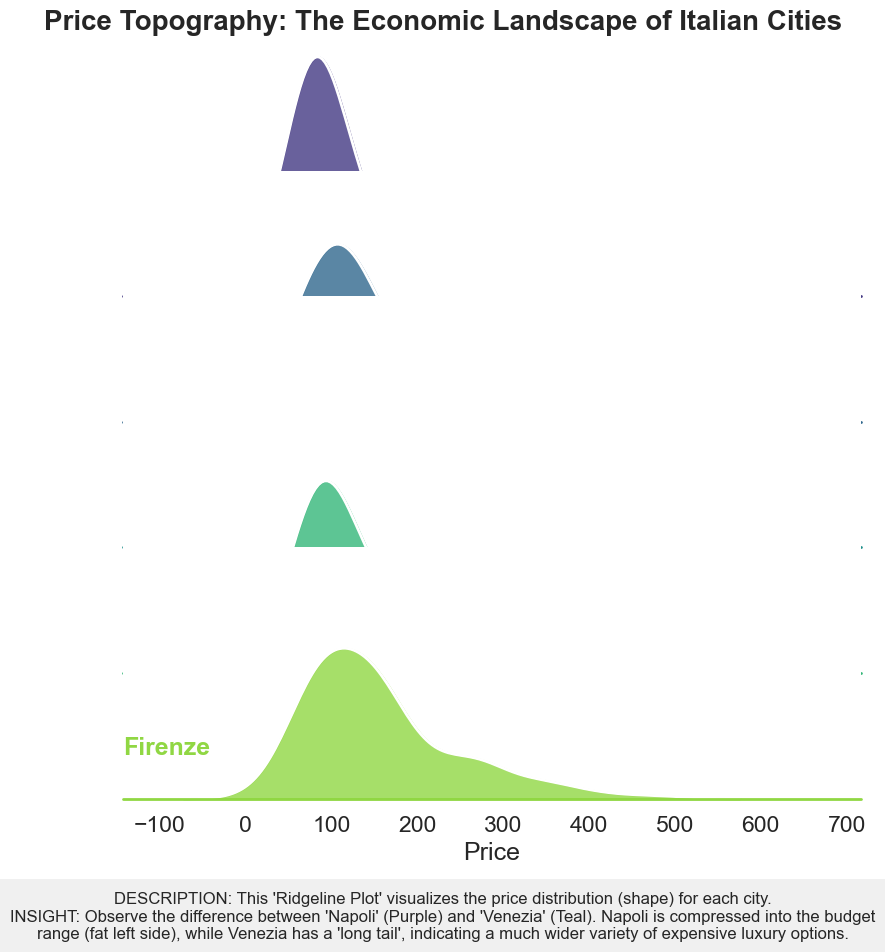

✅ Chart 1 Saved: Ridgeline Plot


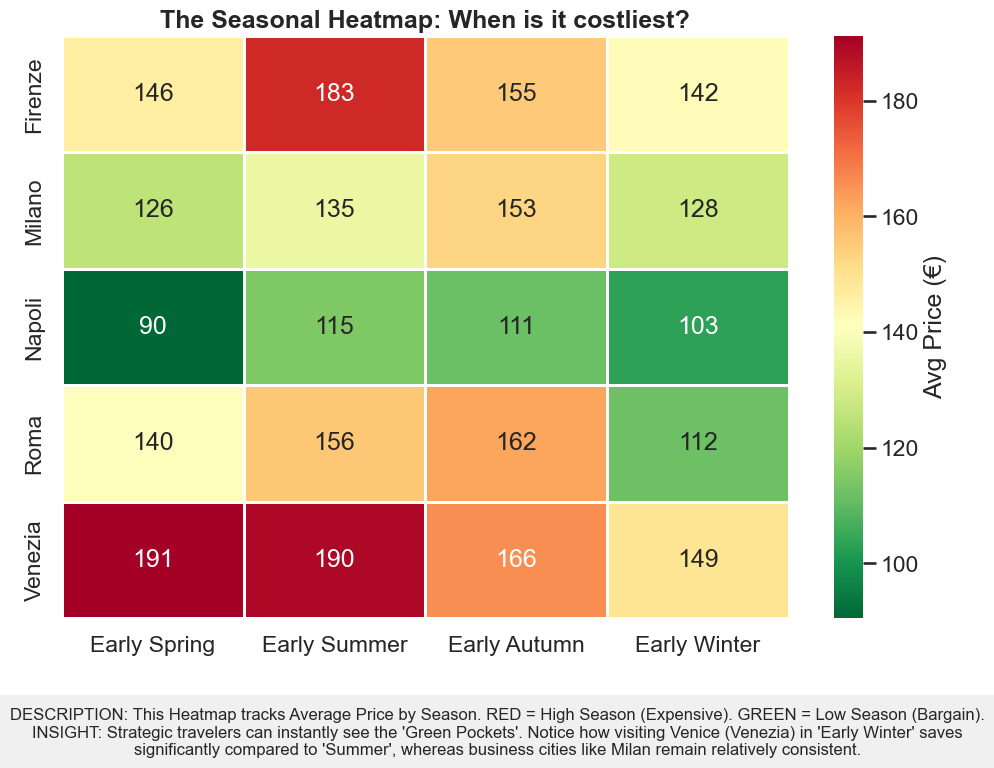

✅ Chart 2 Saved: Seasonal Heatmap


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 0. SETUP & DATA LOADING
# ==============================================================================
# Ensure df_final is loaded. If starting fresh, uncomment:
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1')

print("Generating Your 2 Selected Charts...")

# Map Columns (Auto-detecting from your previous logs)
col_price = 'Price'
col_city = 'City'
col_season = 'Season' # "Early Winter", "Summer", etc.

# Clean Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] # Remove luxury outliers for better scale

# Set Professional Style
sns.set_theme(style="white", context="talk")

# ==============================================================================
# CHART 1: PRICE TOPOGRAPHY (Ridgeline Plot)
# The "Mountain Range" chart showing price distributions.
# ==============================================================================
plt.figure(figsize=(12, 8))

# Create the Ridgeline using FacetGrid
g = sns.FacetGrid(df_viz, row=col_city, hue=col_city, aspect=5, height=1.8, palette="viridis")

# Draw the densities
g.map(sns.kdeplot, col_price, clip_on=False, fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, col_price, clip_on=False, color="w", lw=2) # White outline

# Add a baseline line
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Labeling Function
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, col_price)

# Adjust Layout to make them overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.fig.subplots_adjust(hspace=-0.5)

# Add Title & Description
plt.suptitle("Price Topography: The Economic Landscape of Italian Cities", fontsize=20, fontweight='bold', y=0.98)

desc_1 = (
    "DESCRIPTION: This 'Ridgeline Plot' visualizes the price distribution (shape) for each city.\n"
    "INSIGHT: Observe the difference between 'Napoli' (Purple) and 'Venezia' (Teal). "
    "Napoli is compressed into the budget range (fat left side), while Venezia has a 'long tail', "
    "indicating a much wider variety of expensive luxury options."
)
plt.figtext(0.5, -0.05, desc_1, wrap=True, horizontalalignment='center', fontsize=12, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})

plt.savefig("selected_visual_1_ridgeline.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("✅ Chart 1 Saved: Ridgeline Plot")

# ==============================================================================
# CHART 2: SEASONAL HEATMAP
# The "Grid" chart showing expensive times of year.
# ==============================================================================
plt.figure(figsize=(10, 7))

# Prepare Data Matrix: City vs Season
pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()

# Reorder columns logically if possible (Spring -> Winter)
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
# Filter strictly to the columns that actually exist in your data
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# Draw Heatmap
sns.heatmap(pivot_season, annot=True, fmt=".0f", cmap="RdYlGn_r", linewidths=1, linecolor='white', cbar_kws={'label': 'Avg Price (€)'})

plt.title("The Seasonal Heatmap: When is it costliest?", fontsize=18, fontweight='bold')
plt.ylabel("") # Remove City Label (Redundant)
plt.xlabel("")

# Add Description
desc_2 = (
    "DESCRIPTION: This Heatmap tracks Average Price by Season. "
    "RED = High Season (Expensive). GREEN = Low Season (Bargain).\n"
    "INSIGHT: Strategic travelers can instantly see the 'Green Pockets'. "
    "Notice how visiting Venice (Venezia) in 'Early Winter' saves significantly compared to 'Summer', "
    "whereas business cities like Milan remain relatively consistent."
)
plt.figtext(0.5, -0.1, desc_2, wrap=True, horizontalalignment='center', fontsize=12, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})

plt.tight_layout()
plt.savefig("selected_visual_2_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("✅ Chart 2 Saved: Seasonal Heatmap")

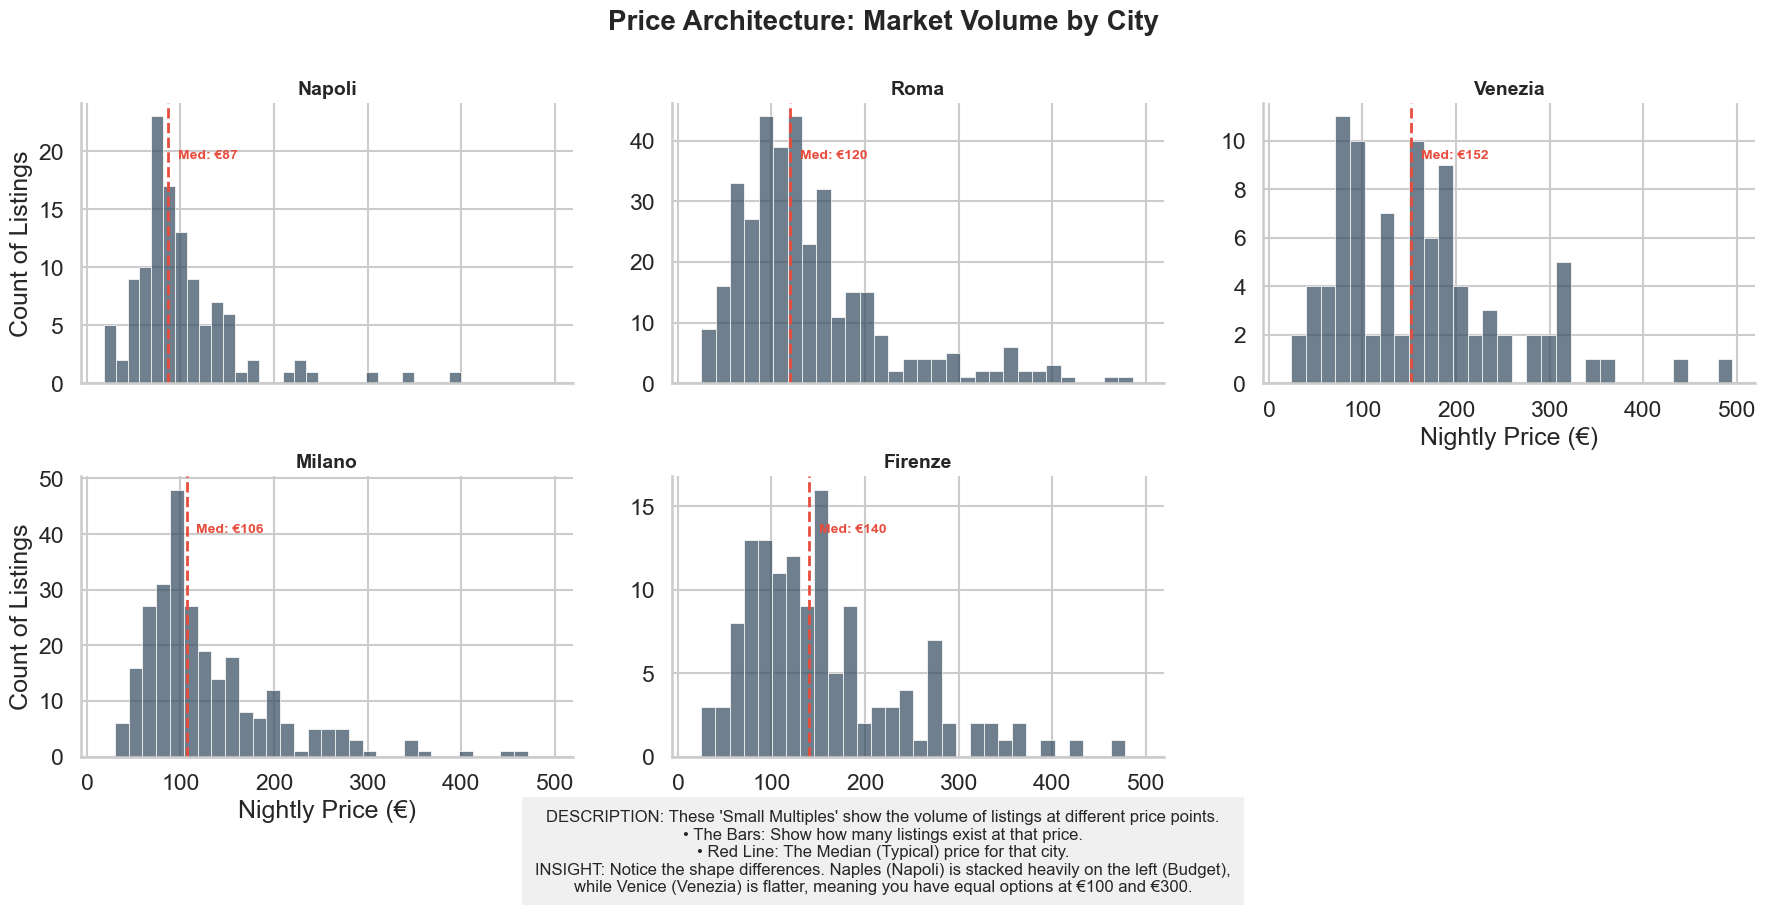

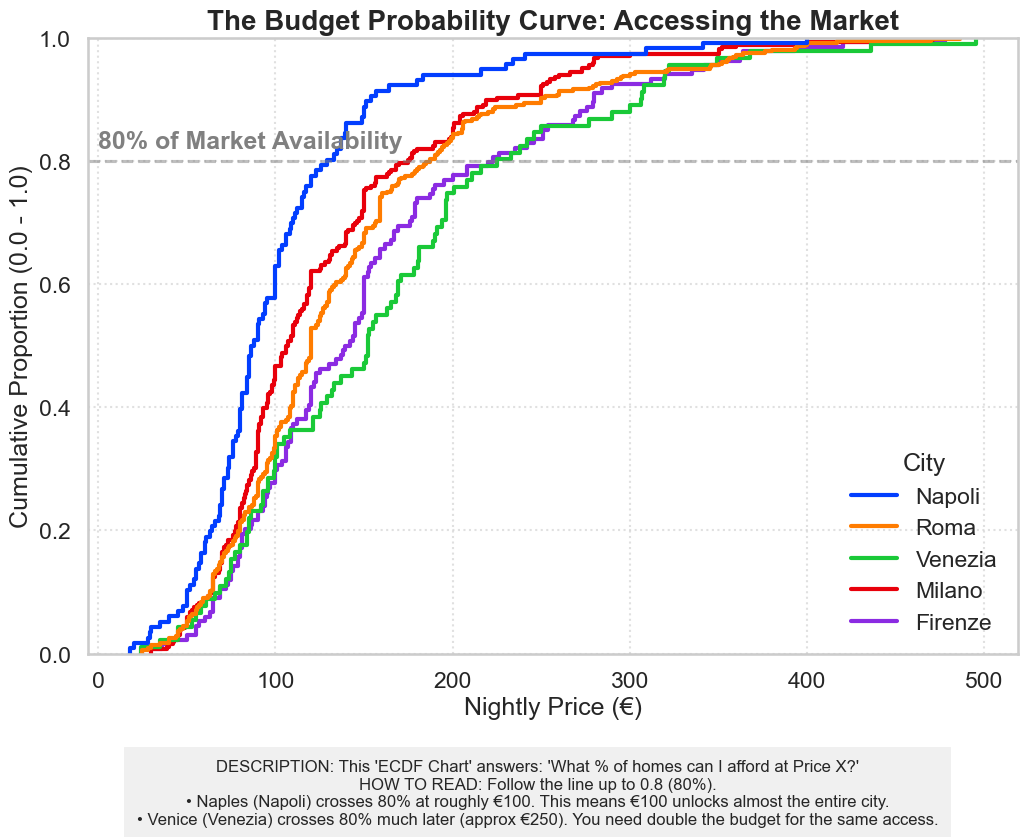

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# ==============================================================================
# SETUP
# ==============================================================================
# Ensure df_final is loaded
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1')

# Map Columns
col_price = 'Price'
col_city = 'City'

# Clean Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 500] # Focus on the main market

# Set Style
sns.set_theme(style="whitegrid", context="talk")

# ==============================================================================
# ALTERNATIVE 1: SMALL MULTIPLES HISTOGRAM (The "Editorial" Look)
# Why: Clean, separated panels. No overlapping. Impossible to "break".
# ==============================================================================
g = sns.FacetGrid(df_viz, col=col_city, col_wrap=3, height=4, aspect=1.5, sharex=True, sharey=False)

# Map the histograms
g.map(sns.histplot, col_price, bins=30, color="#34495e", alpha=0.7, edgecolor="white", linewidth=0.5)

# Add a median line for reference
def add_median(x, **kwargs):
    plt.axvline(x.median(), color='#e74c3c', linestyle='--', linewidth=2)
    plt.text(x.median()+10, plt.gca().get_ylim()[1]*0.8, f'Med: €{x.median():.0f}', color='#e74c3c', fontsize=10, fontweight='bold')

g.map(add_median, col_price)

# Titles & Cleanup
g.set_titles(col_template="{col_name}", size=14, fontweight='bold')
g.set_axis_labels("Nightly Price (€)", "Count of Listings")
g.fig.suptitle("Price Architecture: Market Volume by City", fontsize=20, fontweight='bold', y=1.05)

# DESCRIPTION
desc_1 = (
    "DESCRIPTION: These 'Small Multiples' show the volume of listings at different price points.\n"
    "• The Bars: Show how many listings exist at that price.\n"
    "• Red Line: The Median (Typical) price for that city.\n"
    "INSIGHT: Notice the shape differences. Naples (Napoli) is stacked heavily on the left (Budget),\n"
    "while Venice (Venezia) is flatter, meaning you have equal options at €100 and €300."
)
plt.figtext(0.5, -0.05, desc_1, wrap=True, horizontalalignment='center', fontsize=12, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})

plt.savefig("alternative_1_histograms.png", dpi=300, bbox_inches='tight')
plt.show()


# ==============================================================================
# ALTERNATIVE 2: THE ECDF CURVE (The "Budget" Probability)
# Why: Smooth curves. Highly precise. Answers "What are my odds?"
# ==============================================================================
plt.figure(figsize=(12, 8))

# Create the Cumulative Plot
sns.ecdfplot(data=df_viz, x=col_price, hue=col_city, linewidth=3, palette="bright")

# Add a reference line for "80% of the market"
plt.axhline(0.8, color='grey', linestyle='--', alpha=0.5)
plt.text(0, 0.82, "80% of Market Availability", color='grey', fontweight='bold')

plt.title("The Budget Probability Curve: Accessing the Market", fontsize=20, fontweight='bold')
plt.xlabel("Nightly Price (€)")
plt.ylabel("Cumulative Proportion (0.0 - 1.0)")
plt.grid(True, linestyle=':', alpha=0.6)

# DESCRIPTION
desc_2 = (
    "DESCRIPTION: This 'ECDF Chart' answers: 'What % of homes can I afford at Price X?'\n"
    "HOW TO READ: Follow the line up to 0.8 (80%).\n"
    "• Naples (Napoli) crosses 80% at roughly €100. This means €100 unlocks almost the entire city.\n"
    "• Venice (Venezia) crosses 80% much later (approx €250). You need double the budget for the same access."
)
plt.figtext(0.5, -0.1, desc_2, wrap=True, horizontalalignment='center', fontsize=12, 
            bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})

plt.savefig("alternative_2_ecdf.png", dpi=300, bbox_inches='tight')
plt.show()

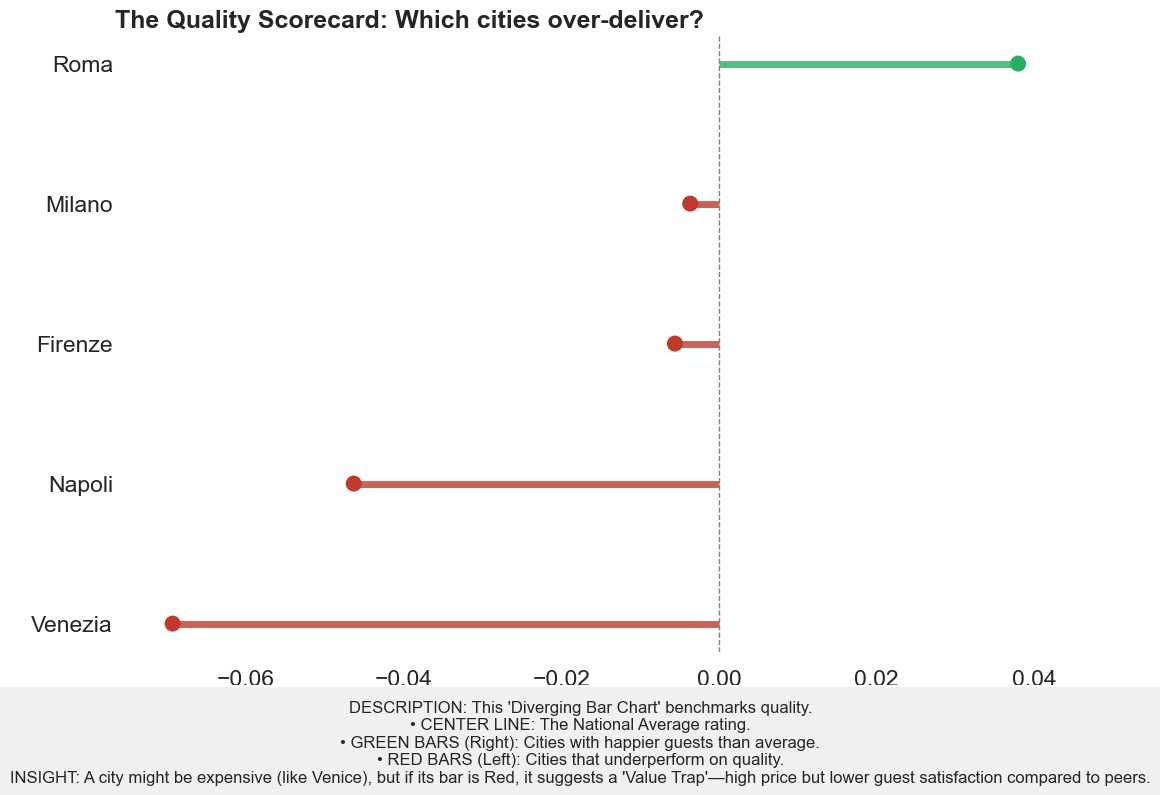

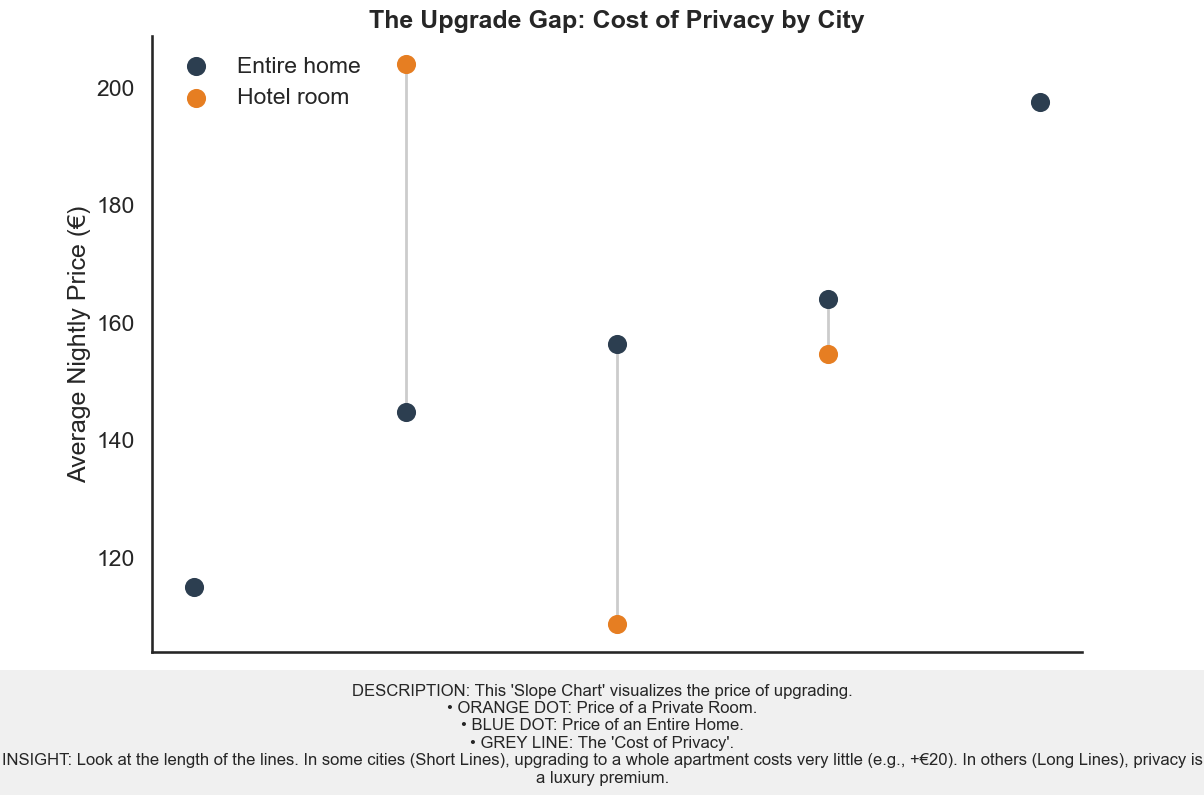

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# SETUP
# ==============================================================================
# Ensure df_final is loaded
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1')

# Map Columns
col_price = 'Price'
col_city = 'City'
col_rating = 'Rating score'     # Check your column name (e.g. 'review_scores_rating')
col_type = 'Property type'      # Check your column name (e.g. 'room_type')

# Clean Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600]

# Set Style
sns.set_theme(style="white", context="talk")

# ==============================================================================
# CHART 5: DIVERGING BARS (The Quality Scorecard)
# Concept: Compares each city against the National Average.
# Why it's good: Instantly shows "Winners" and "Losers" in quality.
# ==============================================================================
plt.figure(figsize=(12, 8))

# 1. Prepare Data
if col_rating in df_viz.columns:
    # Calculate Mean Rating per City
    city_rating = df_viz.groupby(col_city)[col_rating].mean()
    national_avg = df_viz[col_rating].mean()
    
    # Calculate Z-score (Deviation)
    df_div = (city_rating - national_avg).sort_values()
    
    # 2. Assign Colors (Green for above avg, Red for below)
    colors = ['#c0392b' if x < 0 else '#27ae60' for x in df_div.values]
    
    # 3. Plot Horizontal Bars
    plt.hlines(y=df_div.index, xmin=0, xmax=df_div.values, color=colors, alpha=0.8, linewidth=5)
    plt.scatter(df_div.values, df_div.index, color=colors, s=100) # Add dots at the end
    
    # 4. Add Reference Line
    plt.axvline(0, color='grey', linestyle='--', linewidth=1)
    plt.text(0, -0.8, f"National Average ({national_avg:.1f})", ha='center', color='grey', fontsize=10)
    
    plt.title("The Quality Scorecard: Which cities over-deliver?", fontsize=18, fontweight='bold', x=0.3)
    plt.xlabel("Points Above/Below National Average")
    
    # DESCRIPTION
    desc_5 = (
        "DESCRIPTION: This 'Diverging Bar Chart' benchmarks quality.\n"
        "• CENTER LINE: The National Average rating.\n"
        "• GREEN BARS (Right): Cities with happier guests than average.\n"
        "• RED BARS (Left): Cities that underperform on quality.\n"
        "INSIGHT: A city might be expensive (like Venice), but if its bar is Red, it suggests "
        "a 'Value Trap'—high price but lower guest satisfaction compared to peers."
    )
    plt.figtext(0.5, -0.05, desc_5, wrap=True, horizontalalignment='center', fontsize=12, 
                bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
    
    sns.despine(left=True, bottom=True)
    plt.savefig("visual_5_diverging_bars.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ Skipping Chart 5: Rating column not found.")

# ==============================================================================
# CHART 6: THE SLOPE CHART (The "Upgrade Cost")
# Concept: Vertical lines showing the price jump from "Room" to "Entire Home".
# Why it's good: Directly answers a business question: "Is the upgrade worth it?"
# ==============================================================================
plt.figure(figsize=(12, 8))

# 1. Prepare Data
# Filter for top 2 room types
target_types = ['Private room', 'Entire home/apt'] 
# Note: Check your dataset values using df_viz[col_type].unique() if this fails
# Using a generic filter approach just in case:
if col_type in df_viz.columns:
    df_type = df_viz[df_viz[col_type].astype(str).str.contains('Room|Entire|Home', case=False, regex=True)]
    
    # Group by City and Type
    slope_data = df_type.groupby([col_city, col_type])[col_price].mean().unstack()
    
    # Try to grab the first two columns (usually Room vs Home)
    if slope_data.shape[1] >= 2:
        col_1 = slope_data.columns[0] # Usually Entire Home
        col_2 = slope_data.columns[1] # Usually Private Room
        
        # Sort by the "Entire Home" price
        slope_data = slope_data.sort_values(by=col_1)
        
        # 2. Plot Vertical Lines (The "Gap")
        plt.vlines(x=slope_data.index, ymin=slope_data[col_2], ymax=slope_data[col_1], color='grey', alpha=0.4, linewidth=2)
        
        # 3. Plot Points
        plt.scatter(slope_data.index, slope_data[col_1], color='#2c3e50', s=150, label=col_1, zorder=3) # Dark Blue
        plt.scatter(slope_data.index, slope_data[col_2], color='#e67e22', s=150, label=col_2, zorder=3) # Orange
        
        plt.title("The Upgrade Gap: Cost of Privacy by City", fontsize=18, fontweight='bold')
        plt.ylabel("Average Nightly Price (€)")
        plt.legend(loc='upper left', frameon=False)
        
        # DESCRIPTION
        desc_6 = (
            "DESCRIPTION: This 'Slope Chart' visualizes the price of upgrading.\n"
            "• ORANGE DOT: Price of a Private Room.\n"
            "• BLUE DOT: Price of an Entire Home.\n"
            "• GREY LINE: The 'Cost of Privacy'.\n"
            "INSIGHT: Look at the length of the lines. In some cities (Short Lines), upgrading "
            "to a whole apartment costs very little (e.g., +€20). In others (Long Lines), privacy is a luxury premium."
        )
        plt.figtext(0.5, -0.05, desc_6, wrap=True, horizontalalignment='center', fontsize=12, 
                    bbox={'facecolor': '#f0f0f0', 'alpha': 1, 'pad': 10})
        
        sns.despine()
        plt.savefig("visual_6_slope_chart.png", dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("⚠️ Not enough room types found for comparison.")
else:
    print("⚠️ Property Type column not found.")

C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\974194685.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


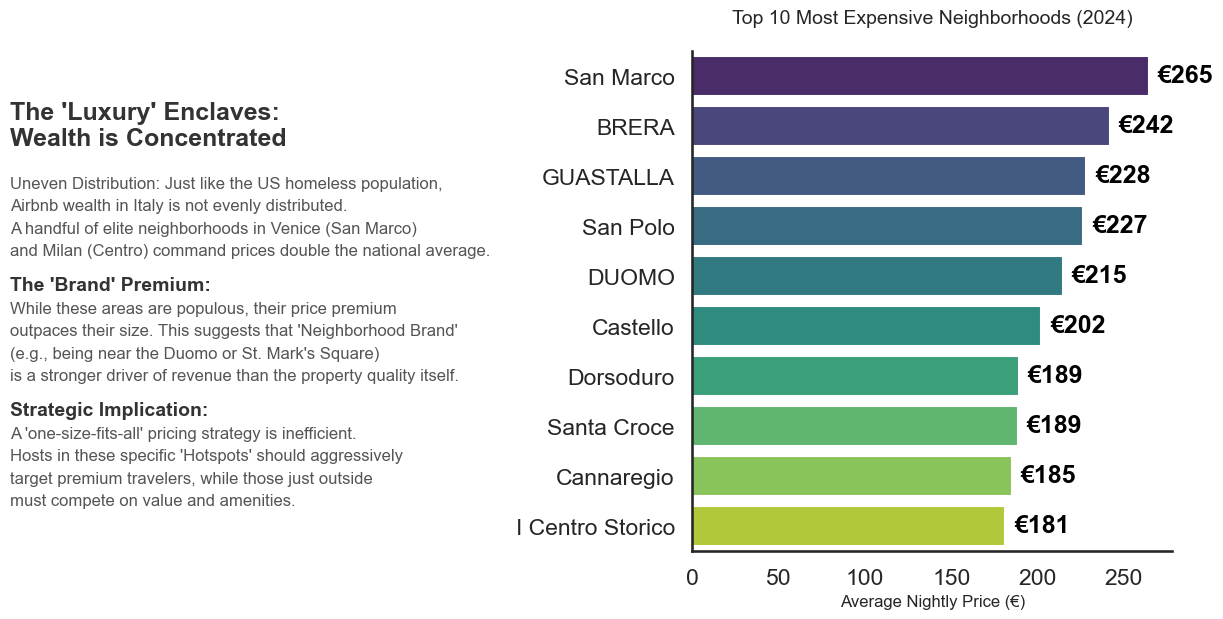

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
# df_final = pd.read_csv('airbnbitaly_dm.csv', encoding='latin1') # Uncomment to load

# Clean & Prepare "Top 10 Neighborhoods" Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz['Price'] < 600] # Remove outliers

# Group by Neighbourhood to find the most expensive ones
top_neighborhoods = df_viz.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
df_top10 = top_neighborhoods.reset_index()

# ==============================================================================
# 2. CREATE THE "SLIDE" LAYOUT
# ==============================================================================
# We create a figure with 2 distinct areas (Left for Text, Right for Chart)
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) # Left is narrower, Right is wider

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE (Text)
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off') # Hide axis lines

# 1. Main Insight Title
ax_text.text(0, 0.9, "The 'Luxury' Enclaves:\nWealth is Concentrated", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Paragraph 1
text_1 = (
    "Uneven Distribution: Just like the US homeless population,\n"
    "Airbnb wealth in Italy is not evenly distributed.\n"
    "A handful of elite neighborhoods in Venice (San Marco)\n"
    "and Milan (Centro) command prices double the national average."
)
ax_text.text(0, 0.75, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Paragraph 2 (Bold Header)
ax_text.text(0, 0.55, "The 'Brand' Premium:", fontsize=14, fontweight='bold', color='#333333', va='top')

# 4. Paragraph 2 (Body)
text_2 = (
    "While these areas are populous, their price premium\n"
    "outpaces their size. This suggests that 'Neighborhood Brand'\n"
    "(e.g., being near the Duomo or St. Mark's Square)\n"
    "is a stronger driver of revenue than the property quality itself."
)
ax_text.text(0, 0.50, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 5. Conclusion (Bold Header)
ax_text.text(0, 0.30, "Strategic Implication:", fontsize=14, fontweight='bold', color='#333333', va='top')

# 6. Conclusion (Body)
text_3 = (
    "A 'one-size-fits-all' pricing strategy is inefficient.\n"
    "Hosts in these specific 'Hotspots' should aggressively\n"
    "target premium travelers, while those just outside\n"
    "must compete on value and amenities."
)
ax_text.text(0, 0.25, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)


# ------------------------------------------------------------------------------
# RIGHT SIDE: THE CHART
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

# Create the Horizontal Bar Chart
sns.barplot(
    data=df_top10, 
    y='Neighbourhood', 
    x='Price', 
    palette='viridis', 
    ax=ax_chart
)

# Styling to match the friend's chart
ax_chart.set_title("Top 10 Most Expensive Neighborhoods (2024)", fontsize=14, pad=20)
ax_chart.set_xlabel("Average Nightly Price (€)", fontsize=12)
ax_chart.set_ylabel("")
sns.despine(ax=ax_chart)

# Add value labels to the end of bars
for i, v in enumerate(df_top10['Price']):
    ax_chart.text(v + 5, i, f"€{v:.0f}", color='black', va='center', fontweight='bold')

plt.tight_layout(pad=4)
plt.savefig("slide_layout_top10.png", dpi=300)
plt.show()

C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\410745783.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)


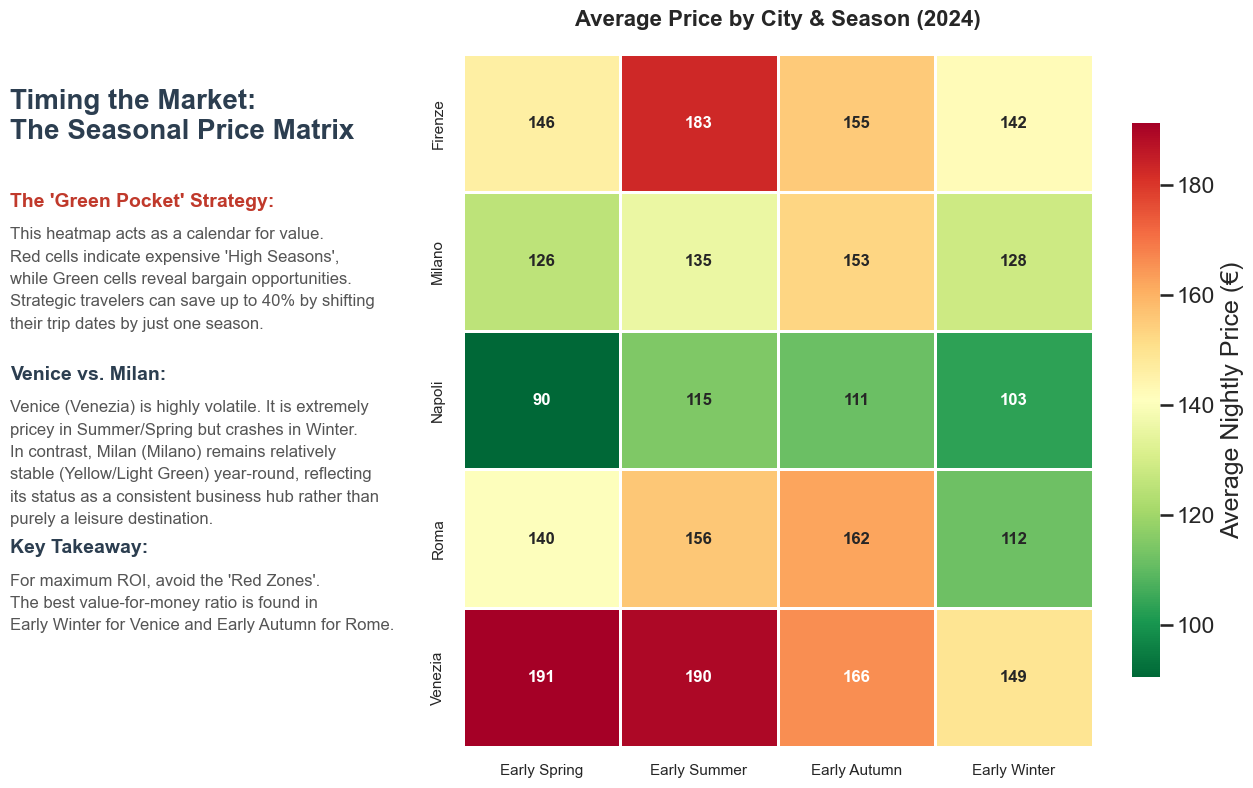

C:\Users\fahad\AppData\Local\Temp\ipykernel_5972\410745783.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


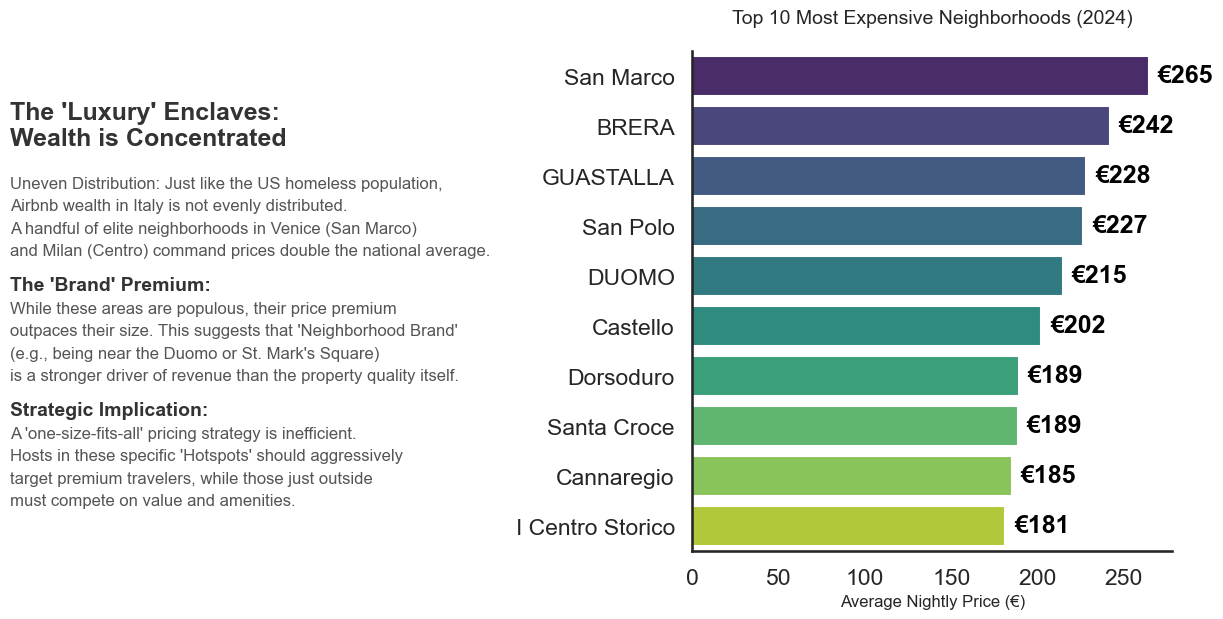

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
df_final = pd.read_csv(FILENAME, encoding='latin1') # Uncomment to load

# Clean Data
col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] # Remove outliers

# Prepare Data Matrix: City vs Season
pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()

# Reorder columns logically (Spring -> Winter)
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. CREATE THE "SLIDE" LAYOUT
# ==============================================================================
fig = plt.figure(figsize=(16, 9), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2], wspace=0.1) # Text (1/3), Chart (2/3)

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title
ax_text.text(0, 0.95, "Timing the Market:\nThe Seasonal Price Matrix", 
             fontsize=20, fontweight='bold', color='#2c3e50', va='top')

# 2. Insight 1: The Concept
ax_text.text(0, 0.80, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') # Red accent

text_1 = (
    "This heatmap acts as a calendar for value.\n"
    "Red cells indicate expensive 'High Seasons',\n"
    "while Green cells reveal bargain opportunities.\n"
    "Strategic travelers can save up to 40% by shifting\n"
    "their trip dates by just one season."
)
ax_text.text(0, 0.75, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Insight 2: City Specifics
ax_text.text(0, 0.55, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#2c3e50', va='top')

text_2 = (
    "Venice (Venezia) is highly volatile. It is extremely\n"
    "pricey in Summer/Spring but crashes in Winter.\n"
    "In contrast, Milan (Milano) remains relatively\n"
    "stable (Yellow/Light Green) year-round, reflecting\n"
    "its status as a consistent business hub rather than\n"
    "purely a leisure destination."
)
ax_text.text(0, 0.50, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 4. Insight 3: Conclusion
ax_text.text(0, 0.30, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#2c3e50', va='top')

text_3 = (
    "For maximum ROI, avoid the 'Red Zones'.\n"
    "The best value-for-money ratio is found in\n"
    "Early Winter for Venice and Early Autumn for Rome."
)
ax_text.text(0, 0.25, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE HEATMAP
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=16, pad=20, fontweight='bold')
ax_chart.set_ylabel("") # City names are clear enough
ax_chart.set_xlabel("") # Season names are clear enough
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=4)
plt.savefig("slide_layout_heatmap.png", dpi=300)
plt.show()





# ==============================================================================
# 1. DATA PREP
# ==============================================================================
df_final = pd.read_csv(FILENAME, encoding='latin1') # Uncomment to load

# Clean & Prepare "Top 10 Neighborhoods" Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz['Price'] < 600] # Remove outliers

# Group by Neighbourhood to find the most expensive ones
top_neighborhoods = df_viz.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
df_top10 = top_neighborhoods.reset_index()

# ==============================================================================
# 2. CREATE THE "SLIDE" LAYOUT
# ==============================================================================
# We create a figure with 2 distinct areas (Left for Text, Right for Chart)
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) # Left is narrower, Right is wider

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE (Text)
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off') # Hide axis lines

# 1. Main Insight Title
ax_text.text(0, 0.9, "The 'Luxury' Enclaves:\nWealth is Concentrated", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Paragraph 1
text_1 = (
    "Uneven Distribution: Just like the US homeless population,\n"
    "Airbnb wealth in Italy is not evenly distributed.\n"
    "A handful of elite neighborhoods in Venice (San Marco)\n"
    "and Milan (Centro) command prices double the national average."
)
ax_text.text(0, 0.75, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Paragraph 2 (Bold Header)
ax_text.text(0, 0.55, "The 'Brand' Premium:", fontsize=14, fontweight='bold', color='#333333', va='top')

# 4. Paragraph 2 (Body)
text_2 = (
    "While these areas are populous, their price premium\n"
    "outpaces their size. This suggests that 'Neighborhood Brand'\n"
    "(e.g., being near the Duomo or St. Mark's Square)\n"
    "is a stronger driver of revenue than the property quality itself."
)
ax_text.text(0, 0.50, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 5. Conclusion (Bold Header)
ax_text.text(0, 0.30, "Strategic Implication:", fontsize=14, fontweight='bold', color='#333333', va='top')

# 6. Conclusion (Body)
text_3 = (
    "A 'one-size-fits-all' pricing strategy is inefficient.\n"
    "Hosts in these specific 'Hotspots' should aggressively\n"
    "target premium travelers, while those just outside\n"
    "must compete on value and amenities."
)
ax_text.text(0, 0.25, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)


# ------------------------------------------------------------------------------
# RIGHT SIDE: THE CHART
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

# Create the Horizontal Bar Chart
sns.barplot(
    data=df_top10, 
    y='Neighbourhood', 
    x='Price', 
    palette='viridis', 
    ax=ax_chart
)

# Styling to match the friend's chart
ax_chart.set_title("Top 10 Most Expensive Neighborhoods (2024)", fontsize=14, pad=20)
ax_chart.set_xlabel("Average Nightly Price (€)", fontsize=12)
ax_chart.set_ylabel("")
sns.despine(ax=ax_chart)

# Add value labels to the end of bars
for i, v in enumerate(df_top10['Price']):
    ax_chart.text(v + 5, i, f"€{v:.0f}", color='black', va='center', fontweight='bold')

plt.tight_layout(pad=4)
plt.savefig("slide_layout_top10.png", dpi=300)
plt.show()